## GRG356T Final Project: Assessing the Influence of the Built Environment on Health Outcomes in the Rio Grande Valley

### Rodrigo Leal
##### EID: JRL5387

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Section 1 - Exploration of NDVI and Land Use Data using Google Earth Engine

In [ ]:
# Install any needed packages
#!pip install geemap
#!pip install ee
#!pip install rasterio
#!pip install leafmap
#!pip install localtileserver
#!pip install StringIO

#!pip install --upgrade earthengine-api
#!pip install --upgrade geemap eemont earthengine-api

In [4]:
from io import StringIO
import geemap
import ee
import os

In [5]:
ee.Authenticate()

In [6]:
### Initialize Google Colab project
ee.Initialize(project='rgv-envirohealth')

In [ ]:
# Create splitmap showing changes in land use in the Rio Grande Valley (study area)

Map = geemap.Map(center=(26.293347296058446, -97.99305342091486), zoom=11, width=1400, height=800)

# Use geemap.split_map to display basemaps side-by-side
Map.split_map(
    left_layer="NLCD 2001 CONUS Land Cover", right_layer="NLCD 2021 CONUS Land Cover", # 2001 on left, 2017 on right
)
Map

Map(center=[26.293347296058446, -97.99305342091486], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize(project='rgv-envirohealth')

# Create a geemap interactive map centered over the Rio Grande Valley
Map = geemap.Map(center=(26.293347296058446, -97.99305342091486), zoom=9)

# Define South Texas counties
counties = ee.FeatureCollection("TIGER/2018/Counties")
south_tx_counties = counties.filter(
    ee.Filter.Or(
        ee.Filter.eq("NAME", "Cameron"),
        ee.Filter.eq("NAME", "Hidalgo"),
        ee.Filter.eq("NAME", "Willacy"),
        ee.Filter.eq("NAME", "Starr")
    )
)
roi = south_tx_counties.geometry()

# Add county outlines to the map
Map.addLayer(
    south_tx_counties.style(**{
        "color": "black",
        "fillColor": "00000000",
        "width": 2
    }),
    {},
    "County Boundaries"
)

# Load the Landsat Annual NDVI Composite collection
collection = ee.ImageCollection("LANDSAT/COMPOSITES/C02/T1_L2_ANNUAL_NDVI")

# Define the target year
target_year = 2022

# Get the specific image for the target year
# The system:index for this dataset is the year as a string
ndvi_image = collection.filter(ee.Filter.eq('system:index', str(target_year))).first()

# Clip to region of interest
ndvi_image = ndvi_image.select('NDVI').clip(roi)

# Define visualization parameters for NDVI
# This dataset has NDVI values in standard -1 to 1 range
vis_params = {
    "min": -0.2,
    "max": 0.8,
    "palette": [
        "FFFFFF", "CE7E45", "DF923D", "F1B555", "FCD163", "99B718",
        "74A901", "66A000", "529400", "3E8601", "207401",
        "056201", "004C00", "023B01", "012E01", "011D01", "011301"
    ]
}

# Add the NDVI layer to the map
Map.addLayer(ndvi_image, vis_params, f"NDVI {target_year}")

# Display the map
Map

Map(center=[26.293347296058446, -97.99305342091486], controls=(WidgetControl(options=['position', 'transparent…

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize(project='rgv-envirohealth')

# Create a geemap interactive map centered over Texas
Map = geemap.Map(center=(31.0, -100.0), zoom=6)

# Load counties dataset
counties = ee.FeatureCollection("TIGER/2018/Counties")

# Define Texas state boundary
texas = counties.filter(ee.Filter.eq("STATEFP", "48"))
texas_boundary = texas.geometry()

# Define RGV counties (Cameron, Hidalgo, Willacy, Starr)
rgv_counties = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "48"),
        ee.Filter.Or(
            ee.Filter.eq("NAME", "Cameron"),
            ee.Filter.eq("NAME", "Hidalgo"),
            ee.Filter.eq("NAME", "Willacy"),
            ee.Filter.eq("NAME", "Starr")
        )
    )
)

# Define Hidalgo County specifically
hidalgo_county = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "48"),
        ee.Filter.eq("NAME", "Hidalgo")
    )
)

# Load the Landsat Annual NDVI Composite collection
collection = ee.ImageCollection("LANDSAT/COMPOSITES/C02/T1_L2_ANNUAL_NDVI")

# Define the target year
target_year = 2022

# Get the specific image for the target year
ndvi_image = collection.filter(ee.Filter.eq('system:index', str(target_year))).first()

# Select NDVI band and clip to Texas
# Use a coarser scale for visualization to reduce data size
ndvi_image = ndvi_image.select('NDVI').clipToCollection(texas)

# Define visualization parameters for NDVI
vis_params = {
    "min": -0.2,
    "max": 0.8,
    "palette": [
        "FFFFFF", "CE7E45", "DF923D", "F1B555", "FCD163", "99B718",
        "74A901", "66A000", "529400", "3E8601", "207401",
        "056201", "004C00", "023B01", "012E01", "011D01", "011301"
    ]
}

# Add the NDVI layer to the map
Map.addLayer(ndvi_image, vis_params, f"NDVI {target_year}")

# Add boundary layers with different colors
# Texas state boundary - Blue
Map.addLayer(
    texas.style(**{
        "color": "0000FF",
        "fillColor": "00000000",
        "width": 3
    }),
    {},
    "Texas State Boundary"
)

# RGV region (4 counties) - Red
Map.addLayer(
    rgv_counties.style(**{
        "color": "FF0000",
        "fillColor": "00000000",
        "width": 2.5
    }),
    {},
    "RGV Region (4 Counties)"
)

# Hidalgo County - Yellow
Map.addLayer(
    hidalgo_county.style(**{
        "color": "FFFF00",
        "fillColor": "00000000",
        "width": 2
    }),
    {},
    "Hidalgo County"
)

# Display the map
Map

Map(center=[31.0, -100.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize(project='rgv-envirohealth')

# Define RGV counties
counties = ee.FeatureCollection("TIGER/2018/Counties")
rgv_counties = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "48"),
        ee.Filter.Or(
            ee.Filter.eq("NAME", "Cameron"),
            ee.Filter.eq("NAME", "Hidalgo"),
            ee.Filter.eq("NAME", "Willacy"),
            ee.Filter.eq("NAME", "Starr")
        )
    )
)
roi = rgv_counties.geometry()

# Load NDVI image for target year
collection = ee.ImageCollection("LANDSAT/COMPOSITES/C02/T1_L2_ANNUAL_NDVI")
target_year = 2022
ndvi_image = collection.filter(ee.Filter.eq('system:index', str(target_year))).first().select('NDVI')

# Function to calculate zonal statistics using reduceRegions
def calculate_zonal_stats_batch(image, features, scale=30):
    """
    Calculate mean, median, std dev, min, max NDVI for each feature using reduceRegions
    Uses full Landsat resolution (30m)
    """
    stats = image.reduceRegions(
        collection=features,
        reducer=ee.Reducer.mean()
            .combine(ee.Reducer.median(), sharedInputs=True)
            .combine(ee.Reducer.stdDev(), sharedInputs=True)
            .combine(ee.Reducer.minMax(), sharedInputs=True),
        scale=scale,
        tileScale=4  # Process in smaller tiles to reduce memory
    )
    return stats

print("Calculating NDVI statistics for Census Tracts...")
print(f"Year: {target_year}")
print("Resolution: 30m (Landsat native resolution)")
print("Using Earth Engine's server-side processing for efficiency.\n")

# Specify the Google Drive folder (change this to your folder path)
# Example: 'MyFolder/Subfolder' or leave empty '' for root
drive_folder = ''  # Change this to match your notebook's folder
print(f"Files will be saved to Google Drive folder: {drive_folder}\n")

# CENSUS TRACT LEVEL - Process each county separately to avoid memory limits
print("Processing Census Tract-level statistics (by county)...")
tracts_all = ee.FeatureCollection('TIGER/2020/TRACT')
county_names = ['Cameron', 'Hidalgo', 'Willacy', 'Starr']
tract_tasks = []

for county_name in county_names:
    print(f"  Processing {county_name} County tracts...")

    # Get this county's geometry
    this_county = rgv_counties.filter(ee.Filter.eq("NAME", county_name))
    county_roi = this_county.geometry()

    # Filter tracts for this county
    county_tracts = tracts_all.filterBounds(county_roi)

    # Calculate stats at 30m resolution
    tract_stats = calculate_zonal_stats_batch(ndvi_image, county_tracts, scale=30)

    # Export
    task = ee.batch.Export.table.toDrive(
        collection=tract_stats,
        description=f'rgv_ndvi_tract_{county_name}_{target_year}',
        folder=drive_folder,  # Save to specified folder
        fileFormat='CSV'
    )
    task.start()
    tract_tasks.append(task)
    print(f"  ✓ {county_name} tract export started (Task ID: {task.id})")

print("\n" + "="*60)
print("All export tasks have been started!")
print("="*60)
print(f"\nTotal tasks: {len(tract_tasks)}")
print(f"\nFiles will be saved to: Google Drive/{drive_folder}/")
print("\nTo monitor progress:")
print("1. Go to: https://code.earthengine.google.com/tasks")
print("2. Or run: geemap.ee_monitor_export_tasks()")
print("\nFiles that will be created:")
for county_name in county_names:
    print(f"  - rgv_ndvi_tract_{county_name}_{target_year}.csv")

# Optional: Monitor initial task status
print("\nMonitoring initial task status...")
import time
time.sleep(3)

for i, task in enumerate(tract_tasks, 1):
    status = task.status()
    print(f"Task {i} ({task.config['description']}): {status['state']}")
    if status['state'] == 'FAILED':
        print(f"  Error: {status.get('error_message', 'Unknown error')}")
print("\nOutput columns will include:")
print("  - STATEFP: State FIPS code")
print("  - COUNTYFP: County FIPS code")
print("  - TRACTCE: Census tract code")
print("  - GEOID: Full census tract GeoID (11 digits)")
print("  - NDVI_mean: Mean NDVI value")
print("  - NDVI_median: Median NDVI value")
print("  - NDVI_stdDev: Standard deviation of NDVI")
print("  - NDVI_min: Minimum NDVI value")
print("  - NDVI_max: Maximum NDVI value")
print("\nGeoID Format: 11 digits (State + County + Tract)")
print("You can join these statistics to census demographic data using the GeoID field.")
print("\nTo combine all counties into one file, use pandas:")
print("  import pandas as pd")
print("  dfs = [pd.read_csv(f'rgv_ndvi_tract_{c}_{target_year}.csv') for c in county_names]")
print("  combined = pd.concat(dfs, ignore_index=True)")
print("  combined.to_csv(f'rgv_ndvi_tract_all_{target_year}.csv', index=False)")

# Optional: Monitor initial task status
print("\nMonitoring initial task status...")
import time
time.sleep(3)

for i, task in enumerate(tract_tasks, 1):
    status = task.status()
    print(f"Task {i} ({task.config['description']}): {status['state']}")
    if status['state'] == 'FAILED':
        print(f"  Error: {status.get('error_message', 'Unknown error')}")

Calculating NDVI statistics for Census Tracts...
Year: 2022
Resolution: 30m (Landsat native resolution)
Using Earth Engine's server-side processing for efficiency.

Files will be saved to Google Drive folder: /content/drive/My Drive/Grad school/GRG356T: Spatial Data Science/Final Project

Processing Census Tract-level statistics (by county)...
  Processing Cameron County tracts...
  ✓ Cameron tract export started (Task ID: CECZXNCLH26EE4F55IKSRSAY)
  Processing Hidalgo County tracts...
  ✓ Hidalgo tract export started (Task ID: RACNHT2OH4UULEBPRZ3VHTWN)
  Processing Willacy County tracts...
  ✓ Willacy tract export started (Task ID: QJUVRMG6DQWNUA6LWWORM2OS)
  Processing Starr County tracts...
  ✓ Starr tract export started (Task ID: JQLJ7WEPW4IK7BFIPO4GNGDZ)

All export tasks have been started!

Total tasks: 4

Files will be saved to: Google Drive//content/drive/My Drive/Grad school/GRG356T: Spatial Data Science/Final Project/

To monitor progress:
1. Go to: https://code.earthengine.g

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize(project='rgv-envirohealth')

# Create a geemap interactive map centered over Texas
Map = geemap.Map(center=(31.0, -100.0), zoom=6)

# Load counties dataset
counties = ee.FeatureCollection("TIGER/2018/Counties")

# Define Texas state boundary
texas = counties.filter(ee.Filter.eq("STATEFP", "48"))
texas_boundary = texas.geometry()

# Define top 20 most populous Texas counties
top_20_counties = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "48"),
        ee.Filter.Or(
            ee.Filter.eq("NAME", "Harris"),
            ee.Filter.eq("NAME", "Dallas"),
            ee.Filter.eq("NAME", "Tarrant"),
            ee.Filter.eq("NAME", "Bexar"),
            ee.Filter.eq("NAME", "Travis"),
            ee.Filter.eq("NAME", "Collin"),
            ee.Filter.eq("NAME", "Denton"),
            ee.Filter.eq("NAME", "Hidalgo"),
            ee.Filter.eq("NAME", "El Paso"),
            ee.Filter.eq("NAME", "Fort Bend"),
            ee.Filter.eq("NAME", "Montgomery"),
            ee.Filter.eq("NAME", "Williamson"),
            ee.Filter.eq("NAME", "Cameron"),
            ee.Filter.eq("NAME", "Brazoria"),
            ee.Filter.eq("NAME", "Bell"),
            ee.Filter.eq("NAME", "Nueces"),
            ee.Filter.eq("NAME", "Galveston"),
            ee.Filter.eq("NAME", "Lubbock"),
            ee.Filter.eq("NAME", "Webb"),
            ee.Filter.eq("NAME", "Hays")
        )
    )
)

# Define RGV counties NOT in top 20 (Willacy, Starr)
rgv_not_top20 = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "48"),
        ee.Filter.Or(
            ee.Filter.eq("NAME", "Willacy"),
            ee.Filter.eq("NAME", "Starr")
        )
    )
)

# Load the Landsat Annual NDVI Composite collection
collection = ee.ImageCollection("LANDSAT/COMPOSITES/C02/T1_L2_ANNUAL_NDVI")

# Define the target year
target_year = 2022

# Get the specific image for the target year
ndvi_image = collection.filter(ee.Filter.eq('system:index', str(target_year))).first()

# Select NDVI band and clip to Texas
# Use a coarser scale for visualization to reduce data size
ndvi_image = ndvi_image.select('NDVI').clipToCollection(texas)

# Define visualization parameters for NDVI
vis_params = {
    "min": -0.2,
    "max": 0.8,
    "palette": [
        "FFFFFF", "CE7E45", "DF923D", "F1B555", "FCD163", "99B718",
        "74A901", "66A000", "529400", "3E8601", "207401",
        "056201", "004C00", "023B01", "012E01", "011D01", "011301"
    ]
}

# Add the NDVI layer to the map
Map.addLayer(ndvi_image, vis_params, f"NDVI {target_year}")

# Add boundary layers with different colors
# Texas state boundary - Blue
Map.addLayer(
    texas.style(**{
        "color": "0000FF",
        "fillColor": "00000000",
        "width": 3
    }),
    {},
    "Texas State Boundary"
)

# Top 20 counties - Yellow
Map.addLayer(
    top_20_counties.style(**{
        "color": "FFFF00",
        "fillColor": "00000000",
        "width": 2.5
    }),
    {},
    "Top 20 Counties (Yellow)"
)

# RGV counties NOT in top 20 (Willacy, Starr) - Red
Map.addLayer(
    rgv_not_top20.style(**{
        "color": "FF0000",
        "fillColor": "00000000",
        "width": 2.5
    }),
    {},
    "RGV - Willacy & Starr (Red)"
)

# Display the map
Map

Map(center=[31.0, -100.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

# Section 2 - Data Loading, Cleaning, and Processing

In [7]:
# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/tx_top20_all_ndvi_tracts_2022.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/ACS_CensusTracts_TX.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/PLACES__Health_Census_Tract_Data_2024.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/ParksbyTract.tsv', sep='\t')
df5 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/EJScreen_2024.csv')

#df6 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/nhgis_tract2022_tl2022_nlcd2021.csv')
#df7 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/CDC_LifeExpectancy_TX.csv')
#df8 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/CACES_AirQuality_2020.csv')
#df9 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/Census_UHI_US_Urbanized_recalculated.csv')


/tmp/ipython-input-1954899508.py:6: DtypeWarning: Columns (172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('/content/drive/MyDrive/Grad school/GRG356T: Spatial Data Science/Final Project/data/EJScreen_2024.csv')


In [ ]:
df1.head()

system:index      ALAND    AWATER  COUNTYFP COUNTY_NAME FUNCSTAT  \
0  00010000000000002fa1    1981569    354829       453      Travis        S   
1  00010000000000002fbb    2351554    162056       453      Travis        S   
2  000100000000000032c7    4463160      2569        27        Bell        S   
3  000100000000000032fe   31044906    100928        27        Bell        S   
4  00010000000000003033  578139460  11484687       491  Williamson        S   

         GEOID   INTPTLAT   INTPTLON  MTFCC   NAME          NAMELSAD  STATEFP  \
0  48453001000  30.252831 -97.725829  G5020   10.0   Census Tract 10       48   
1  48453001200  30.272783 -97.759185  G5020   12.0   Census Tract 12       48   
2  48027020500  31.121144 -97.330466  G5020  205.0  Census Tract 205       48   
3  48027020800  31.054339 -97.303287  G5020  208.0  Census Tract 208       48   
4  48491020900  30.546566 -97.308378  G5020  209.0  Census Tract 209       48   

   TRACTCE       max      mean    median       min    stdDev  \
0     1000  0.802752  0.390251  0.426166 -0.329390  0.203899   
1     1200  0.788209  0.346222  0.365499 -0.205969  0.184145   
2    20500  0.796652  0.417925  0.431657 -0.009202  0.149511   
3    20800  0.864754  0.373497  0.363543 -0.257170  0.138431   
4    20900  0.876981  0.408453  0.402358 -0.750589  0.159766   

                                                .geo  
0  {"type":"Polygon","coordinates":[[[-97.7365522...  
1  {"type":"Polygon","coordinates":[[[-97.7716052...  
2  {"type":"Polygon","coordinates":[[[-97.3409140...  
3  {"type":"Polygon","coordinates":[[[-97.3376811...  
4  {"type":"Polygon","coordinates":[[[-97.4669149...

In [ ]:
df2.head()

Geo_FIPS                                     Geo_QName Geo_STUSAB  \
0  48001950100     Census Tract 9501, Anderson County, Texas         tx   
1  48001950401  Census Tract 9504.01, Anderson County, Texas         tx   
2  48001950402  Census Tract 9504.02, Anderson County, Texas         tx   
3  48001950500     Census Tract 9505, Anderson County, Texas         tx   
4  48001950600     Census Tract 9506, Anderson County, Texas         tx   

   Geo_SUMLEV  Geo_GEOCOMP  Geo_US  Geo_REGION  Geo_DIVISION  Geo_STATE  \
0         140            0     NaN         NaN           NaN         48   
1         140            0     NaN         NaN           NaN         48   
2         140            0     NaN         NaN           NaN         48   
3         140            0     NaN         NaN           NaN         48   
4         140            0     NaN         NaN           NaN         48   

   Geo_COUNTY  ...  SE_A10054B_003  SE_A10054B_004  SE_A10054B_005  \
0           1  ...             125              49              56   
1           1  ...               0               5               4   
2           1  ...               0               0               0   
3           1  ...             226             130               4   
4           1  ...             240             324              42   

   SE_A10054B_006  SE_A10054B_007  SE_A20001_001  SE_A20001_002  \
0              12               0           5316           1199   
1               0               0             85             17   
2               0               0             41              0   
3               0               0           4489            727   
4              12               0           5217            978   

   SE_A20001_003  SE_A20001_004  SE_A20001_005  
0           4117           1930           3206  
1             68             27             60  
2             41             17             24  
3           3762           2344           2110  
4           4239           2467           2215  

[5 rows x 220 columns]

In [ ]:
df3.head()

StateAbbr StateDesc CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AL   Alabama    Autauga        1001  1001020100             1775   
1        AL   Alabama    Autauga        1001  1001020200             2055   
2        AL   Alabama    Autauga        1001  1001020300             3216   
3        AL   Alabama    Autauga        1001  1001020400             4246   
4        AL   Alabama    Autauga        1001  1001020501             4322   

   TotalPop18plus  ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0            1370               11.2      ( 8.7, 14.2)                 35.2   
1            1584               10.7      ( 8.6, 12.9)                 32.3   
2            2485               10.9      ( 8.7, 13.5)                 35.7   
3            3344                8.4      ( 6.5, 10.8)                 37.0   
4            3369                7.9      ( 6.1, 10.3)                 32.3   

   ... FOODINSECU_Crude95CI  HOUSINSECU_CrudePrev HOUSINSECU_Crude95CI  \
0  ...         (14.9, 18.6)                  14.2         (12.5, 16.0)   
1  ...         (19.1, 23.5)                  19.1         (17.1, 21.3)   
2  ...         (15.2, 18.9)                  15.0         (13.3, 16.8)   
3  ...         (11.1, 14.0)                  10.7         ( 9.5, 12.1)   
4  ...         ( 8.9, 11.4)                   9.6         ( 8.5, 10.9)   

   SHUTUTILITY_CrudePrev SHUTUTILITY_Crude95CI  LACKTRPT_CrudePrev  \
0                    9.3          ( 8.1, 10.6)                 9.7   
1                   12.1          (10.7, 13.8)                11.4   
2                    9.8          ( 8.7, 11.2)                 9.8   
3                    6.9          ( 6.0,  7.8)                 7.6   
4                    6.2          ( 5.4,  7.1)                 6.5   

  LACKTRPT_Crude95CI  EMOTIONSPT_CrudePrev EMOTIONSPT_Crude95CI  \
0       ( 8.8, 10.7)                  25.9         (22.4, 29.7)   
1       (10.4, 12.6)                  30.7         (27.0, 34.9)   
2       ( 9.0, 10.9)                  25.9         (22.4, 29.6)   
3       ( 6.9,  8.4)                  24.7         (21.4, 28.5)   
4       ( 5.9,  7.3)                  23.1         (19.9, 26.6)   

                      Geolocation  
0  POINT (-86.4915648 32.4819731)  
1   POINT (-86.4724678 32.475758)  
2  POINT (-86.4597033 32.4740243)  
3  POINT (-86.4448353 32.4710304)  
4  POINT (-86.4225578 32.4478607)  

[5 rows x 88 columns]

In [ ]:
df4.head()

TRACT_FIPS20  ANY_OPEN_PARK  COUNT_OPEN_PARKS  COUNT_OPEN_PARKS_TC10  \
0    1001020100              1                 3                      3   
1    1001020200              1                 3                      3   
2    1001020300              1                 2                      2   
3    1001020400              1                 2                      2   
4    1001020501              1                 1                      1   

   COUNT_OPEN_PARKS_TC5  COUNT_OPEN_PARKS_TC3  TRACT_AREA  TRACT_AREA_SQMILES  \
0                     3                     3  9853734.58            3.804548   
1                     3                     3  3326482.50            1.284362   
2                     2                     2  5358327.18            2.068862   
3                     2                     2  6392682.93            2.468229   
4                     1                     1  6203653.39            2.395244   

   TOT_PARK_AREA  TOT_PARK_AREA_SQMILES  PROP_PARK_AREA_TRACT  
0      83098.218               0.032084              0.008433  
1      99480.419               0.038410              0.029906  
2     101038.779               0.039011              0.018856  
3      46718.660               0.018038              0.007308  
4      44941.779               0.017352              0.007244

In [ ]:
df5.head()

OID_          ID STATE_NAME ST_ABBREV       CNTY_NAME  REGION  ACSTOTPOP  \
0     1  1001020100    ALABAMA        AL  Autauga County       4     1865.0   
1     2  1001020200    ALABAMA        AL  Autauga County       4     1861.0   
2     3  1001020300    ALABAMA        AL  Autauga County       4     3492.0   
3     4  1001020400    ALABAMA        AL  Autauga County       4     3987.0   
4     5  1001020501    ALABAMA        AL  Autauga County       4     4121.0   

   ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  ...  T_D2_DWATER  T_D5_DWATER   AREALAND  \
0      1865.0      1266.0     700.0  ...      84 %ile      95 %ile  9825303.0   
1      1669.0      1475.0     544.0  ...      92 %ile      91 %ile  3320818.0   
2      3486.0      2296.0    1305.0  ...      87 %ile      88 %ile  5349271.0   
3      3987.0      3077.0    1666.0  ...      81 %ile      93 %ile  6384282.0   
4      4121.0      2958.0    1783.0  ...      76 %ile      85 %ile  6203654.0   

   AREAWATER  NPL_CNT  TSDF_CNT  EXCEED_COUNT_80  EXCEED_COUNT_80_SUP  \
0    28435.0      0.0       0.0              1.0                  2.0   
1     5669.0      0.0       0.0              1.0                  1.0   
2     9054.0      0.0       0.0              1.0                  1.0   
3     8408.0      0.0       0.0              1.0                  3.0   
4        0.0      0.0       0.0              0.0                  1.0   

   Shape_Length  Shape_Area  
0      0.153800    0.000945  
1      0.092916    0.000319  
2      0.100499    0.000514  
3      0.117871    0.000613  
4      0.109853    0.000595  

[5 rows x 230 columns]

In [ ]:
df5.columns.tolist()

['OID_',
 'GEOID',
 'STATE_NAME',
 'ST_ABBREV',
 'CNTY_NAME',
 'REGION',
 'ACSTOTPOP',
 'ACSIPOVBAS',
 'ACSEDUCBAS',
 'ACSTOTHH',
 'ACSTOTHU',
 'ACSUNEMPBAS',
 'ACSDISABBAS',
 'DEMOGIDX_2',
 'DEMOGIDX_5',
 'PEOPCOLOR',
 'PEOPCOLORPCT',
 'LOWINCOME',
 'LOWINCPCT',
 'UNEMPLOYED',
 'UNEMPPCT',
 'DISABILITY',
 'DISABILITYPCT',
 'LINGISO',
 'LINGISOPCT',
 'LESSHS',
 'LESSHSPCT',
 'UNDER5',
 'UNDER5PCT',
 'OVER64',
 'OVER64PCT',
 'LIFEEXPPCT',
 'PM25',
 'OZONE',
 'DSLPM',
 'RSEI_AIR',
 'PTRAF',
 'PRE1960',
 'PRE1960PCT',
 'PNPL',
 'PRMP',
 'PTSDF',
 'UST',
 'PWDIS',
 'NO2',
 'DWATER',
 'D2_PM25',
 'D5_PM25',
 'D2_OZONE',
 'D5_OZONE',
 'D2_DSLPM',
 'D5_DSLPM',
 'D2_RSEI_AIR',
 'D5_RSEI_AIR',
 'D2_PTRAF',
 'D5_PTRAF',
 'D2_LDPNT',
 'D5_LDPNT',
 'D2_PNPL',
 'D5_PNPL',
 'D2_PRMP',
 'D5_PRMP',
 'D2_PTSDF',
 'D5_PTSDF',
 'D2_UST',
 'D5_UST',
 'D2_PWDIS',
 'D5_PWDIS',
 'D2_NO2',
 'D5_NO2',
 'D2_DWATER',
 'D5_DWATER',
 'P_DEMOGIDX_2',
 'P_DEMOGIDX_5',
 'P_PEOPCOLORPCT',
 'P_LOWINCPCT',
 'P_UNEMPPCT'

In [8]:
df1.rename(columns={'GEOID': 'GEOID'}, inplace=True)
df2.rename(columns={'Geo_FIPS': 'GEOID'}, inplace=True)
df3.rename(columns={'TractFIPS': 'GEOID'}, inplace=True)
df4.rename(columns={'TRACT_FIPS20': 'GEOID'}, inplace=True)
df5.rename(columns={'ID': 'GEOID'}, inplace=True)

In [9]:
df1['GEOID'] = df1['GEOID'].astype(str)
df2['GEOID'] = df2['GEOID'].astype(str)
df3['GEOID'] = df3['GEOID'].astype(str)
df4['GEOID'] = df4['GEOID'].astype(str)
df5['GEOID'] = df5['GEOID'].astype(str)

In [10]:
# Perform an outer merge based on GEOID
merged_data = pd.merge(df1, df2, on='GEOID', how='outer')
merged_data = pd.merge(merged_data, df3, on='GEOID', how='outer')
merged_data = pd.merge(merged_data, df4, on='GEOID', how='outer')
merged_data = pd.merge(merged_data, df5, on='GEOID', how='outer')

merged_data

system:index  ALAND  AWATER  COUNTYFP COUNTY_NAME FUNCSTAT        GEOID  \
0              NaN    NaN     NaN       NaN         NaN      NaN  10001040100   
1              NaN    NaN     NaN       NaN         NaN      NaN  10001040201   
2              NaN    NaN     NaN       NaN         NaN      NaN  10001040203   
3              NaN    NaN     NaN       NaN         NaN      NaN  10001040204   
4              NaN    NaN     NaN       NaN         NaN      NaN  10001040205   
...            ...    ...     ...       ...         ...      ...          ...   
86960          NaN    NaN     NaN       NaN         NaN      NaN   9190253400   
86961          NaN    NaN     NaN       NaN         NaN      NaN   9190253500   
86962          NaN    NaN     NaN       NaN         NaN      NaN   9190257100   
86963          NaN    NaN     NaN       NaN         NaN      NaN   9190425700   
86964          NaN    NaN     NaN       NaN         NaN      NaN   9190990000   

       INTPTLAT  INTPTLON MTFCC  ...  T_D2_DWATER T_D5_DWATER     AREALAND  \
0           NaN       NaN   NaN  ...       0 %ile      0 %ile  124745857.0   
1           NaN       NaN   NaN  ...       0 %ile      0 %ile    9732880.0   
2           NaN       NaN   NaN  ...       0 %ile      0 %ile   59871724.0   
3           NaN       NaN   NaN  ...       0 %ile      0 %ile    6926052.0   
4           NaN       NaN   NaN  ...       0 %ile      0 %ile    3338851.0   
...         ...       ...   ...  ...          ...         ...          ...   
86960       NaN       NaN   NaN  ...      70 %ile     71 %ile   37277698.0   
86961       NaN       NaN   NaN  ...       0 %ile      0 %ile   68802186.0   
86962       NaN       NaN   NaN  ...       0 %ile      0 %ile   56757602.0   
86963       NaN       NaN   NaN  ...      75 %ile     74 %ile   17360266.0   
86964       NaN       NaN   NaN  ...          NaN         NaN          0.0   

         AREAWATER  NPL_CNT  TSDF_CNT  EXCEED_COUNT_80  EXCEED_COUNT_80_SUP  \
0              0.0      0.0       0.0              0.0                  0.0   
1          37251.0      0.0       0.0              0.0                  0.0   
2        1058666.0      0.0       0.0              1.0                  0.0   
3         194346.0      0.0       0.0              0.0                  0.0   
4              0.0      0.0       0.0              0.0                  0.0   
...            ...      ...       ...              ...                  ...   
86960    4122562.0      1.0       0.0              0.0                  0.0   
86961     529044.0      1.0       0.0              0.0                  0.0   
86962    3967080.0      1.0       0.0              0.0                  0.0   
86963     672562.0      1.0       2.0              0.0                  0.0   
86964  194005248.0      0.0       0.0              0.0                  0.0   

       Shape_Length Shape_Area  
0          0.499362   0.013015  
1          0.165429   0.001020  
2          0.408435   0.006362  
3          0.117842   0.000743  
4          0.081704   0.000349  
...             ...        ...  
86960      0.475981   0.004469  
86961      0.493093   0.007493  
86962      0.408593   0.006556  
86963      0.270354   0.001947  
86964      0.984230   0.020770  

[86965 rows x 565 columns]

In [11]:
# Filter the dataset by State
target_state = 'Texas'

filtered_data = merged_data[merged_data['StateDesc'] == target_state]

# Display the filtered data
print(filtered_data)

      system:index  ALAND  AWATER  COUNTYFP COUNTY_NAME FUNCSTAT        GEOID  \
58097          NaN    NaN     NaN       NaN         NaN      NaN  48001950100   
58098          NaN    NaN     NaN       NaN         NaN      NaN  48001950401   
58099          NaN    NaN     NaN       NaN         NaN      NaN  48001950402   
58100          NaN    NaN     NaN       NaN         NaN      NaN  48001950500   
58101          NaN    NaN     NaN       NaN         NaN      NaN  48001950600   
...            ...    ...     ...       ...         ...      ...          ...   
64988          NaN    NaN     NaN       NaN         NaN      NaN  48505950402   
64989          NaN    NaN     NaN       NaN         NaN      NaN  48507950100   
64990          NaN    NaN     NaN       NaN         NaN      NaN  48507950200   
64991          NaN    NaN     NaN       NaN         NaN      NaN  48507950301   
64992          NaN    NaN     NaN       NaN         NaN      NaN  48507950302   

       INTPTLAT  INTPTLON M

In [12]:
filtered_data.describe()

ALAND        AWATER     COUNTYFP     INTPTLAT     INTPTLON  \
count  4.767000e+03  4.767000e+03  4767.000000  4767.000000  4767.000000   
mean   1.207802e+07  6.640086e+05   213.295784    30.649653   -97.255353   
std    9.399950e+07  9.591295e+06   140.135444     1.975770     2.273754   
min    1.295410e+05  0.000000e+00    27.000000    25.875706  -106.617734   
25%    1.628096e+06  0.000000e+00   113.000000    29.638083   -97.754960   
50%    2.785280e+06  6.860000e+02   201.000000    30.173777   -96.945849   
75%    5.704790e+06  4.239600e+04   303.000000    32.752969   -95.568177   
max    5.659909e+09  5.051447e+08   491.000000    33.784484   -94.577374   

              NAME  STATEFP        TRACTCE          max         mean  ...  \
count  4767.000000   4767.0    4767.000000  4767.000000  4767.000000  ...   
mean   1899.476258     48.0  189947.625760     0.764423     0.380461  ...   
std    2318.395661      0.0  231839.566108     0.090434     0.113462  ...   
min       1.000000     48.0     100.000000     0.290086    -0.363399  ...   
25%     165.315000     48.0   16531.500000     0.728186     0.320863  ...   
50%     461.000000     48.0   46100.000000     0.792982     0.390921  ...   
75%    3318.500000     48.0  331850.000000     0.826692     0.451827  ...   
max    9807.000000     48.0  980700.000000     0.891210     0.712099  ...   

       B_D2_DWATER  B_D5_DWATER      AREALAND     AREAWATER      NPL_CNT  \
count  6829.000000  6829.000000  6.844000e+03  6.844000e+03  6844.000000   
mean      3.619564     3.581491  9.843369e+07  2.125783e+06     0.014757   
std       3.917007     3.867570  4.766311e+08  1.957246e+07     0.126504   
min       1.000000     1.000000  1.295410e+05  0.000000e+00     0.000000   
25%       1.000000     1.000000  1.985673e+06  0.000000e+00     0.000000   
50%       1.000000     1.000000  4.011311e+06  7.503500e+03     0.000000   
75%       8.000000     8.000000  1.819270e+07  1.906922e+05     0.000000   
max      11.000000    11.000000  1.599487e+10  8.663851e+08     2.000000   

          TSDF_CNT  EXCEED_COUNT_80  EXCEED_COUNT_80_SUP  Shape_Length  \
count  6844.000000      6844.000000          6844.000000   6844.000000   
mean      0.124635         3.644506             3.100088      0.272394   
std       0.713606         3.985618             3.788128      0.462494   
min       0.000000         0.000000             0.000000      0.015487   
25%       0.000000         0.000000             0.000000      0.063589   
50%       0.000000         2.000000             1.000000      0.096264   
75%       0.000000         7.000000             5.000000      0.224966   
max      35.000000        13.000000            13.000000      6.374039   

        Shape_Area  
count  6844.000000  
mean      0.009550  
std       0.045463  
min       0.000012  
25%       0.000189  
50%       0.000389  
75%       0.001810  
max       1.494761  

[8 rows x 455 columns]

In [13]:
# Check for duplicate GEOIDs
duplicates = filtered_data[filtered_data['GEOID'].duplicated(keep=False)]

# Print them (if any)
print(f"Number of duplicate GEOIDs: {duplicates.shape[0]}")
print(duplicates)

Number of duplicate GEOIDs: 0
Empty DataFrame
Columns: [system:index, ALAND, AWATER, COUNTYFP, COUNTY_NAME, FUNCSTAT, GEOID, INTPTLAT, INTPTLON, MTFCC, NAME, NAMELSAD, STATEFP, TRACTCE, max, mean, median, min, stdDev, .geo, Geo_QName, Geo_STUSAB, Geo_SUMLEV, Geo_GEOCOMP, Geo_US, Geo_REGION, Geo_DIVISION, Geo_STATE, Geo_COUNTY, Geo_COUSUB, Geo_PLACE, Geo_TRACT, Geo_BLKGRP, Geo_CONCIT, Geo_AIANHH, Geo_AIANHHFP, Geo_AIHHTLI, Geo_AITS, Geo_ANRC, Geo_CBSA, Geo_CSA, Geo_METDIV, Geo_MACC, Geo_MEMI, Geo_NECTA, Geo_CNECTA, Geo_NECTADIV, Geo_UA, Geo_CDCURR, Geo_SLDU, Geo_SLDL, Geo_ZCTA3, Geo_ZCTA5, Geo_SUBMCD, Geo_SDELM, Geo_SDSEC, Geo_SDUNI, Geo_UR, Geo_PCI, Geo_PUMA5, Geo_GEO_ID, Geo_NAME, Geo_BTTR, Geo_BTBG, Geo_PLACESE, SE_A00001_001, SE_A00002_001, SE_A00002_002, SE_A00002_003, SE_A02001_001, SE_A02001_002, SE_A02001_003, SE_A01001_001, SE_A01001_002, SE_A01001_003, SE_A01001_004, SE_A01001_005, SE_A01001_006, SE_A01001_007, SE_A01001_008, SE_A01001_009, SE_A01001_010, SE_A01001_011, SE_A01

In [14]:
print(filtered_data.columns.tolist())

['system:index', 'ALAND', 'AWATER', 'COUNTYFP', 'COUNTY_NAME', 'FUNCSTAT', 'GEOID', 'INTPTLAT', 'INTPTLON', 'MTFCC', 'NAME', 'NAMELSAD', 'STATEFP', 'TRACTCE', 'max', 'mean', 'median', 'min', 'stdDev', '.geo', 'Geo_QName', 'Geo_STUSAB', 'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_US', 'Geo_REGION', 'Geo_DIVISION', 'Geo_STATE', 'Geo_COUNTY', 'Geo_COUSUB', 'Geo_PLACE', 'Geo_TRACT', 'Geo_BLKGRP', 'Geo_CONCIT', 'Geo_AIANHH', 'Geo_AIANHHFP', 'Geo_AIHHTLI', 'Geo_AITS', 'Geo_ANRC', 'Geo_CBSA', 'Geo_CSA', 'Geo_METDIV', 'Geo_MACC', 'Geo_MEMI', 'Geo_NECTA', 'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA', 'Geo_CDCURR', 'Geo_SLDU', 'Geo_SLDL', 'Geo_ZCTA3', 'Geo_ZCTA5', 'Geo_SUBMCD', 'Geo_SDELM', 'Geo_SDSEC', 'Geo_SDUNI', 'Geo_UR', 'Geo_PCI', 'Geo_PUMA5', 'Geo_GEO_ID', 'Geo_NAME', 'Geo_BTTR', 'Geo_BTBG', 'Geo_PLACESE', 'SE_A00001_001', 'SE_A00002_001', 'SE_A00002_002', 'SE_A00002_003', 'SE_A02001_001', 'SE_A02001_002', 'SE_A02001_003', 'SE_A01001_001', 'SE_A01001_002', 'SE_A01001_003', 'SE_A01001_004', 'SE_A01001_005

# Section 3 - Exploratory Data Analysis (EDA)



In [17]:
# Select relevant predictors and socioeconomic factors
selected_columns = [
    'GEOID', # Identifier
    # County
    'COUNTY_NAME',
    # Socioeconomic factors
    'SE_A14006_001',
    'SE_A00002_002',
    'PEOPCOLORPCT',
    'LOWINCPCT',
    'LINGISOPCT',
    'UNDER5PCT',
    'OVER64PCT',
    'LESSHSPCT',
     'UNEMPPCT',
    # Environmental factors
    'max',
    'mean',
    'median',
    'min',
    'stdDev',
    'COUNT_OPEN_PARKS',
    'TRACT_AREA',
    'TOT_PARK_AREA',
    'PROP_PARK_AREA_TRACT',
    # Health indicators
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev',
 ]

In [18]:
# Filter the merged dataset to only include relevant columns
filtered_data = filtered_data[selected_columns]
filtered_data.head()

GEOID COUNTY_NAME  SE_A14006_001  PEOPCOLORPCT  LOWINCPCT  \
58097  48001950100         NaN        67344.0      0.229119   0.315538   
58098  48001950401         NaN        98750.0      0.774722   0.327586   
58099  48001950402         NaN            NaN      0.706422   1.000000   
58100  48001950500         NaN        59358.0      0.554939   0.486588   
58101  48001950600         NaN        44250.0      0.396659   0.449608   

       LINGISOPCT  UNDER5PCT  OVER64PCT  LESSHSPCT  UNEMPPCT  ...  \
58097    0.000000   0.081245   0.200266   0.087415  0.069991  ...   
58098    0.000000   0.000000   0.022885   0.316047  0.000000  ...   
58099    0.000000   0.000000   0.022171   0.298599  0.000000  ...   
58100    0.042807   0.093222   0.182743   0.114726  0.028555  ...   
58101    0.000000   0.073789   0.146292   0.131086  0.023524  ...   

       BPHIGH_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  \
58097              41.4               10.3            9.6   
58098              26.5                7.6            3.5   
58099              54.8               10.2           12.0   
58100              39.2               10.6            8.6   
58101              44.2               11.4            8.8   

       DEPRESSION_CrudePrev  DIABETES_CrudePrev  ISOLATION_CrudePrev  \
58097                  24.0                15.8                 33.4   
58098                  17.3                 8.7                 40.0   
58099                  21.5                26.9                 38.4   
58100                  23.1                16.4                 35.1   
58101                  24.6                17.7                 36.9   

       LPA_CrudePrev  OBESITY_CrudePrev  MHLTH_CrudePrev  PHLTH_CrudePrev  
58097           27.9               37.8             17.6             15.3  
58098           22.2               38.1             17.7              9.8  
58099           53.6               60.0             25.7             28.0  
58100           32.0               40.0             19.0             15.9  
58101           36.5               43.5             22.0             17.9  

[5 rows x 29 columns]

In [19]:
filtered_data.rename(columns={
    'COUNTY_NAME': "COUNTY",
    'SE_A14006_001': 'HHINCOME_Median',
    'SE_A00002_002': 'POPDENSITY',
    'PEOPCOLORPCT': 'PEOPCOLOR_Pct',
    'LOWINCPCT': 'LOWINC_Pct',
    'LINGISOPCT': 'LINGISO_Pct',
    'UNDER5PCT': 'UNDER5_Pct',
    'OVER64PCT': 'OVER64_Pct',
    'LESSHSPCT': 'LESSHS_Pct',
    'UNEMPPCT': 'UNEMP_Pct',
    'max': 'NDVI_Max',
    'mean': 'NDVI_Mean',
    'median': 'NDVI_Med',
    'min': 'NDVI_Min',
    'stdDev': 'NDVI_StdDev',
    'COUNT_OPEN_PARKS': 'PARKS_Count',
    'TRACT_AREA': 'TRACT_Area',
    'TOT_PARK_AREA': 'PARKS_Area',
    'PROP_PARK_AREA_TRACT': 'PARKS_PctTotArea'
}, inplace=True)

In [20]:
filtered_data.head()

GEOID COUNTY  HHINCOME_Median  PEOPCOLOR_Pct  LOWINC_Pct  \
58097  48001950100    NaN          67344.0       0.229119    0.315538   
58098  48001950401    NaN          98750.0       0.774722    0.327586   
58099  48001950402    NaN              NaN       0.706422    1.000000   
58100  48001950500    NaN          59358.0       0.554939    0.486588   
58101  48001950600    NaN          44250.0       0.396659    0.449608   

       LINGISO_Pct  UNDER5_Pct  OVER64_Pct  LESSHS_Pct  UNEMP_Pct  ...  \
58097     0.000000    0.081245    0.200266    0.087415   0.069991  ...   
58098     0.000000    0.000000    0.022885    0.316047   0.000000  ...   
58099     0.000000    0.000000    0.022171    0.298599   0.000000  ...   
58100     0.042807    0.093222    0.182743    0.114726   0.028555  ...   
58101     0.000000    0.073789    0.146292    0.131086   0.023524  ...   

       BPHIGH_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  \
58097              41.4               10.3            9.6   
58098              26.5                7.6            3.5   
58099              54.8               10.2           12.0   
58100              39.2               10.6            8.6   
58101              44.2               11.4            8.8   

       DEPRESSION_CrudePrev  DIABETES_CrudePrev  ISOLATION_CrudePrev  \
58097                  24.0                15.8                 33.4   
58098                  17.3                 8.7                 40.0   
58099                  21.5                26.9                 38.4   
58100                  23.1                16.4                 35.1   
58101                  24.6                17.7                 36.9   

       LPA_CrudePrev  OBESITY_CrudePrev  MHLTH_CrudePrev  PHLTH_CrudePrev  
58097           27.9               37.8             17.6             15.3  
58098           22.2               38.1             17.7              9.8  
58099           53.6               60.0             25.7             28.0  
58100           32.0               40.0             19.0             15.9  
58101           36.5               43.5             22.0             17.9  

[5 rows x 29 columns]

In [21]:
df = filtered_data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 58097 to 64992
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GEOID                 6844 non-null   object 
 1   COUNTY                4767 non-null   object 
 2   HHINCOME_Median       6802 non-null   float64
 3   PEOPCOLOR_Pct         6844 non-null   float64
 4   LOWINC_Pct            6844 non-null   float64
 5   LINGISO_Pct           6844 non-null   float64
 6   UNDER5_Pct            6844 non-null   float64
 7   OVER64_Pct            6844 non-null   float64
 8   LESSHS_Pct            6844 non-null   float64
 9   UNEMP_Pct             6844 non-null   float64
 10  NDVI_Max              4767 non-null   float64
 11  NDVI_Mean             4767 non-null   float64
 12  NDVI_Med              4767 non-null   float64
 13  NDVI_Min              4767 non-null   float64
 14  NDVI_StdDev           4767 non-null   float64
 15  PARKS_Count          

In [22]:
# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Drop rows with NaN values
df = df.dropna()

In [23]:
df.describe()

HHINCOME_Median  PEOPCOLOR_Pct   LOWINC_Pct  LINGISO_Pct   UNDER5_Pct  \
count      4739.000000    4739.000000  4739.000000  4739.000000  4739.000000   
mean      85555.129563       0.656684     0.332207     0.092428     0.065100   
std       44111.862899       0.253200     0.204466     0.112599     0.033766   
min        6311.000000       0.027586     0.000369     0.000000     0.000000   
25%       53750.000000       0.448229     0.155852     0.015550     0.042252   
50%       75611.000000       0.686275     0.303168     0.051471     0.061266   
75%      106749.000000       0.889995     0.486407     0.128979     0.083755   
max      250001.000000       1.000000     0.975292     0.775163     0.326191   

        OVER64_Pct   LESSHS_Pct    UNEMP_Pct     NDVI_Max    NDVI_Mean  ...  \
count  4739.000000  4739.000000  4739.000000  4739.000000  4739.000000  ...   
mean      0.123678     0.162620     0.055840     0.764451     0.380520  ...   
std       0.073402     0.149113     0.042805     0.090458     0.113390  ...   
min       0.000000     0.000000     0.000000     0.290086    -0.363399  ...   
25%       0.076240     0.042959     0.026533     0.728414     0.321321  ...   
50%       0.114623     0.108931     0.046780     0.793069     0.391075  ...   
75%       0.158053     0.253103     0.074847     0.826692     0.451827  ...   
max       0.906582     0.714286     0.428224     0.891210     0.712099  ...   

       BPHIGH_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  \
count       4739.000000         4739.00000    4739.000000   
mean          32.144334            9.43524       6.192762   
std            5.899679            1.03537       1.987727   
min           10.000000            5.00000       1.000000   
25%           28.700000            8.80000       4.800000   
50%           32.100000            9.40000       6.100000   
75%           35.500000           10.10000       7.300000   
max           59.100000           15.10000      19.600000   

       DEPRESSION_CrudePrev  DIABETES_CrudePrev  ISOLATION_CrudePrev  \
count           4739.000000         4739.000000          4739.000000   
mean              21.578751           13.824288            36.373159   
std                2.502960            4.591347             3.800059   
min               11.300000            2.400000            23.200000   
25%               19.900000           10.500000            33.600000   
50%               21.500000           13.000000            36.400000   
75%               23.100000           16.600000            39.200000   
max               35.600000           37.500000            49.300000   

       LPA_CrudePrev  OBESITY_CrudePrev  MHLTH_CrudePrev  PHLTH_CrudePrev  
count    4739.000000        4739.000000      4739.000000      4739.000000  
mean       27.667947          36.237350        17.870479        13.343954  
std         9.521922           6.747107         3.531730         4.301383  
min        10.300000          15.400000         7.200000         4.900000  
25%        20.000000          31.100000        15.400000        10.100000  
50%        26.100000          36.100000        17.700000        12.500000  
75%        34.700000          41.100000        20.200000        16.100000  
max        64.500000          55.700000        36.600000        36.400000  

[8 rows x 27 columns]

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr= [
    # Socioeconomic factors
    'HHINCOME_Median',
    'POPDENSITY',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Max',
    'NDVI_Mean',
    'NDVI_Med',
    'NDVI_Min',
    'NDVI_StdDev',
    'PARKS_Count',
    'TRACT_Area',
    'PARKS_Area',
    'PARKS_PctTotArea',
    # Health outcomes
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev'
 ]

In [ ]:
corr_df = df[selected_corr]
corr_df.replace('-', np.nan, inplace=True)
corr_df.describe()

/tmp/ipython-input-4183204777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.replace('-', np.nan, inplace=True)


HHINCOME_Median  PEOPCOLOR_Pct   LOWINC_Pct  LINGISO_Pct   UNDER5_Pct  \
count      4739.000000    4739.000000  4739.000000  4739.000000  4739.000000   
mean      85555.129563       0.656684     0.332207     0.092428     0.065100   
std       44111.862899       0.253200     0.204466     0.112599     0.033766   
min        6311.000000       0.027586     0.000369     0.000000     0.000000   
25%       53750.000000       0.448229     0.155852     0.015550     0.042252   
50%       75611.000000       0.686275     0.303168     0.051471     0.061266   
75%      106749.000000       0.889995     0.486407     0.128979     0.083755   
max      250001.000000       1.000000     0.975292     0.775163     0.326191   

        OVER64_Pct   LESSHS_Pct    UNEMP_Pct     NDVI_Max    NDVI_Mean  ...  \
count  4739.000000  4739.000000  4739.000000  4739.000000  4739.000000  ...   
mean      0.123678     0.162620     0.055840     0.764451     0.380520  ...   
std       0.073402     0.149113     0.042805     0.090458     0.113390  ...   
min       0.000000     0.000000     0.000000     0.290086    -0.363399  ...   
25%       0.076240     0.042959     0.026533     0.728414     0.321321  ...   
50%       0.114623     0.108931     0.046780     0.793069     0.391075  ...   
75%       0.158053     0.253103     0.074847     0.826692     0.451827  ...   
max       0.906582     0.714286     0.428224     0.891210     0.712099  ...   

       BPHIGH_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  \
count       4739.000000         4739.00000    4739.000000   
mean          32.144334            9.43524       6.192762   
std            5.899679            1.03537       1.987727   
min           10.000000            5.00000       1.000000   
25%           28.700000            8.80000       4.800000   
50%           32.100000            9.40000       6.100000   
75%           35.500000           10.10000       7.300000   
max           59.100000           15.10000      19.600000   

       DEPRESSION_CrudePrev  DIABETES_CrudePrev  ISOLATION_CrudePrev  \
count           4739.000000         4739.000000          4739.000000   
mean              21.578751           13.824288            36.373159   
std                2.502960            4.591347             3.800059   
min               11.300000            2.400000            23.200000   
25%               19.900000           10.500000            33.600000   
50%               21.500000           13.000000            36.400000   
75%               23.100000           16.600000            39.200000   
max               35.600000           37.500000            49.300000   

       LPA_CrudePrev  OBESITY_CrudePrev  MHLTH_CrudePrev  PHLTH_CrudePrev  
count    4739.000000        4739.000000      4739.000000      4739.000000  
mean       27.667947          36.237350        17.870479        13.343954  
std         9.521922           6.747107         3.531730         4.301383  
min        10.300000          15.400000         7.200000         4.900000  
25%        20.000000          31.100000        15.400000        10.100000  
50%        26.100000          36.100000        17.700000        12.500000  
75%        34.700000          41.100000        20.200000        16.100000  
max        64.500000          55.700000        36.600000        36.400000  

[8 rows x 27 columns]

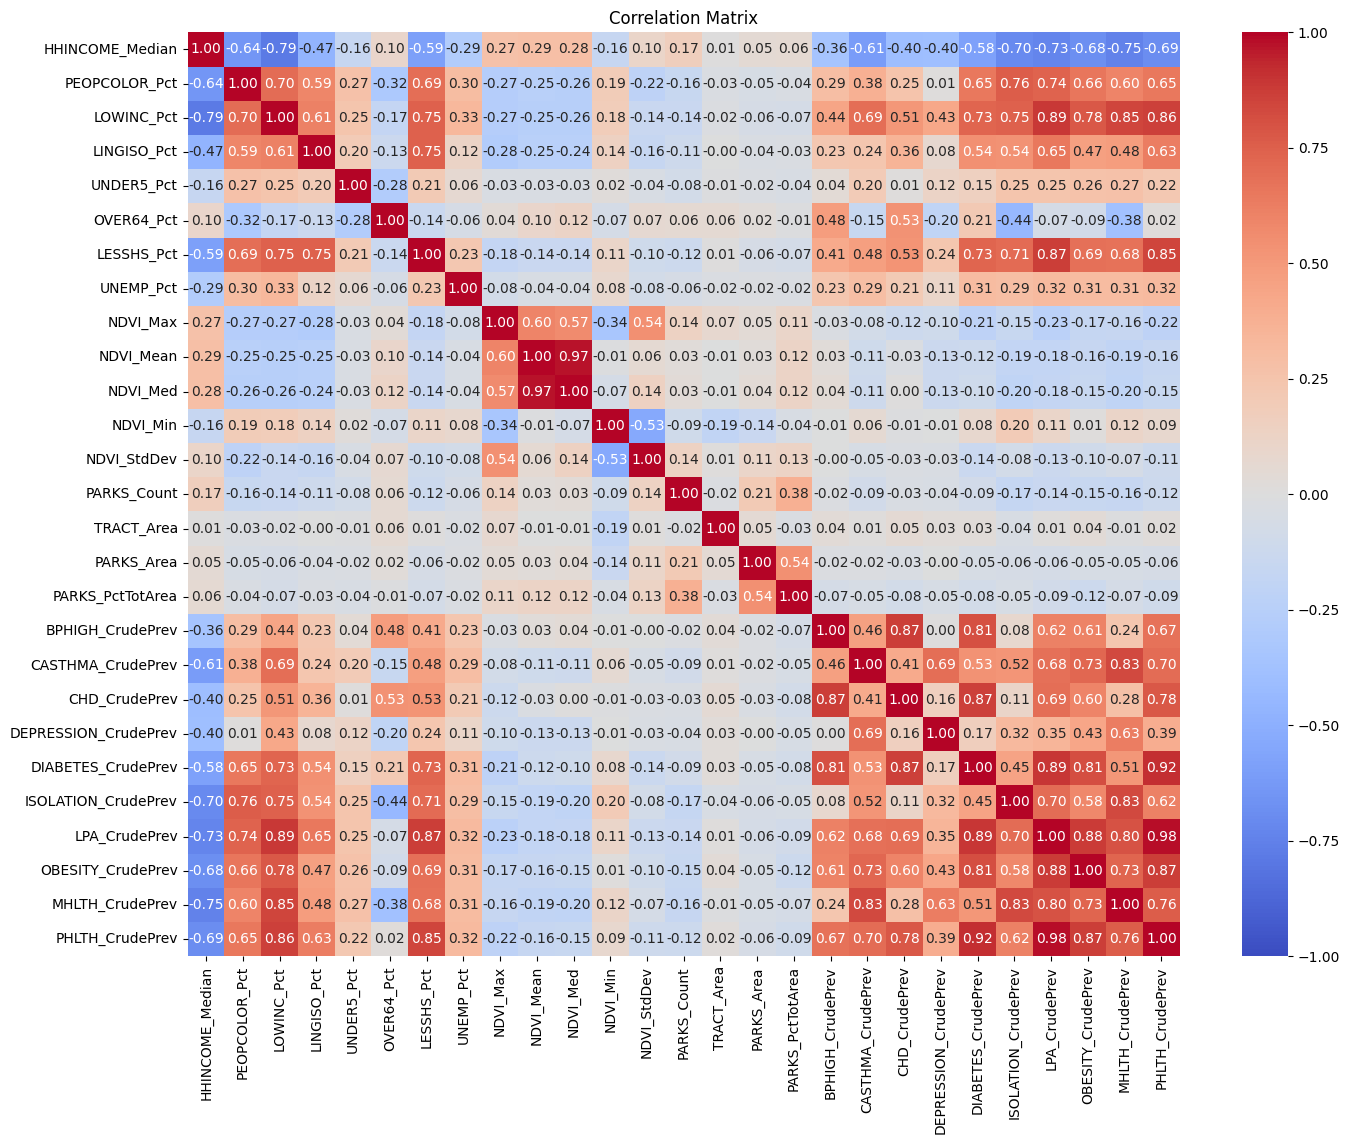

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr1= [
    # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'DIABETES_CrudePrev',
 ]

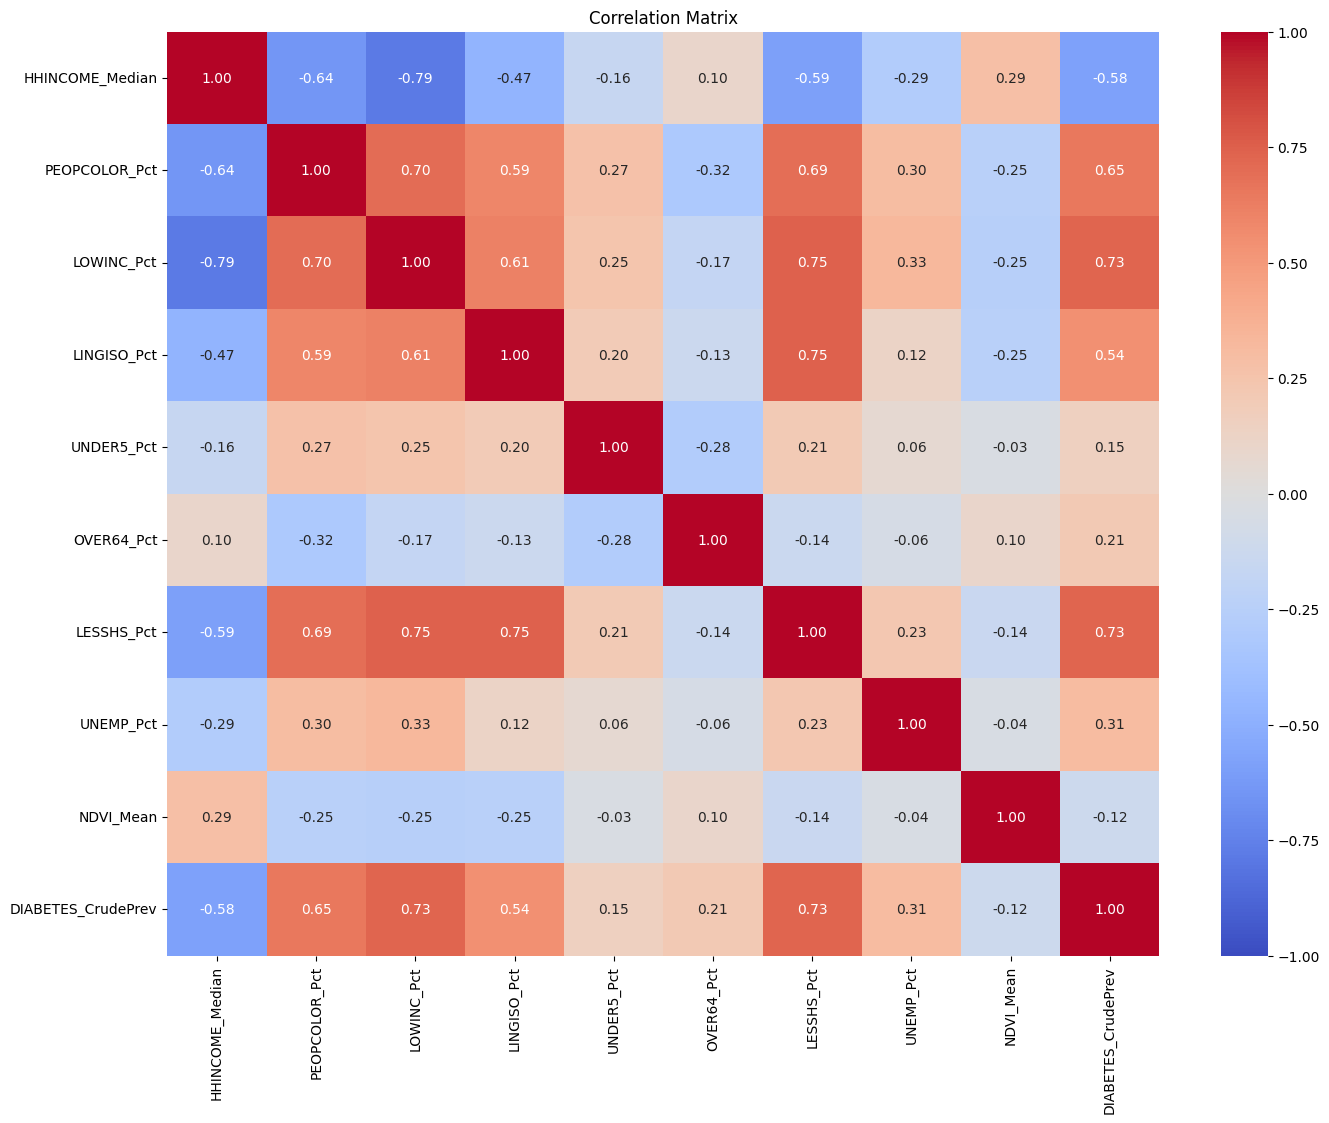

In [ ]:
corr1_df = df[selected_corr1]

plt.figure(figsize=(16, 12))
sns.heatmap(corr1_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr2= [
    # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'OBESITY_CrudePrev',
 ]

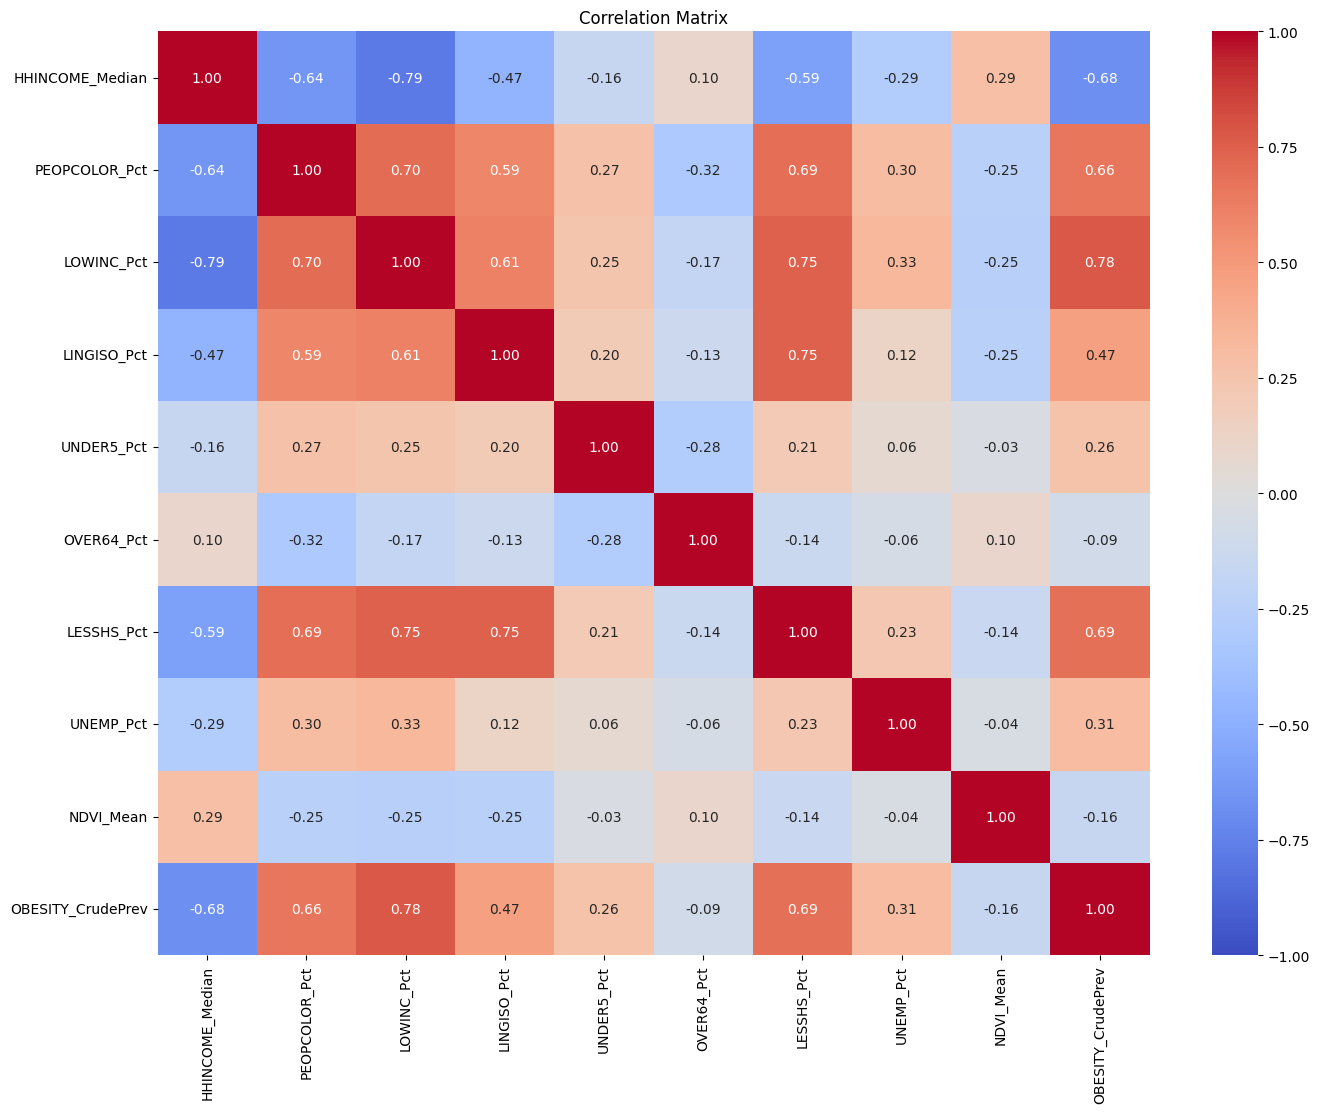

In [ ]:
corr2_df = df[selected_corr2]

plt.figure(figsize=(16, 12))
sns.heatmap(corr2_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr3= [
    # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'CHD_CrudePrev',
 ]

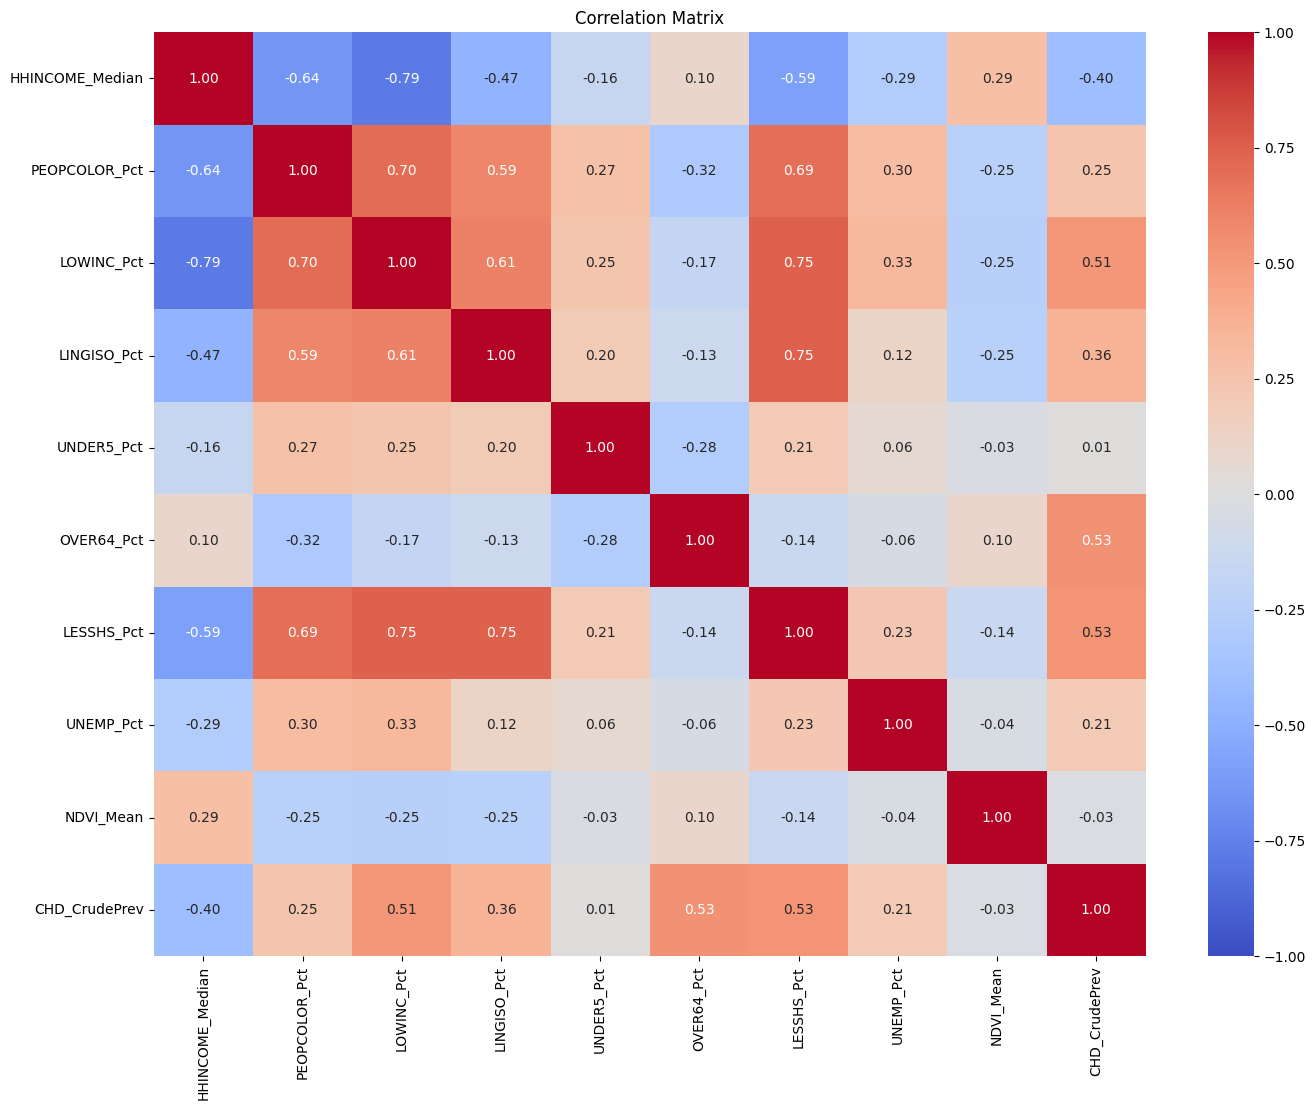

In [ ]:
corr3_df = df[selected_corr3]

plt.figure(figsize=(16, 12))
sns.heatmap(corr3_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr4= [
    # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'DEPRESSION_CrudePrev',
 ]

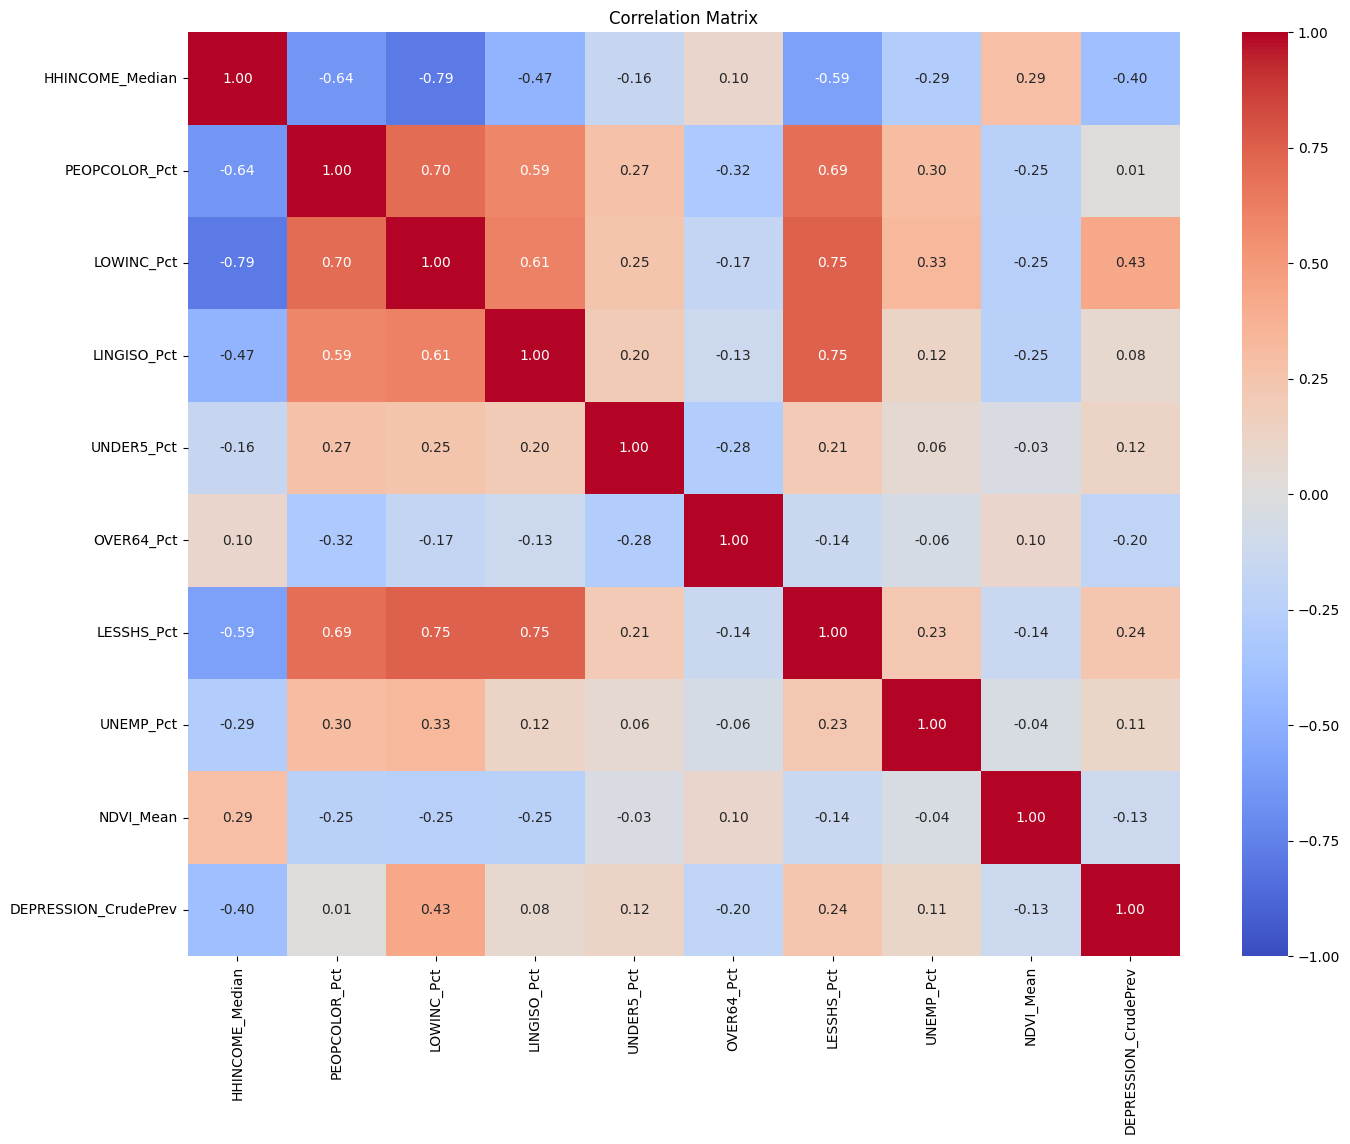

In [ ]:
corr4_df = df[selected_corr4]

plt.figure(figsize=(16, 12))
sns.heatmap(corr4_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr5= [
      # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'MHLTH_CrudePrev'
 ]

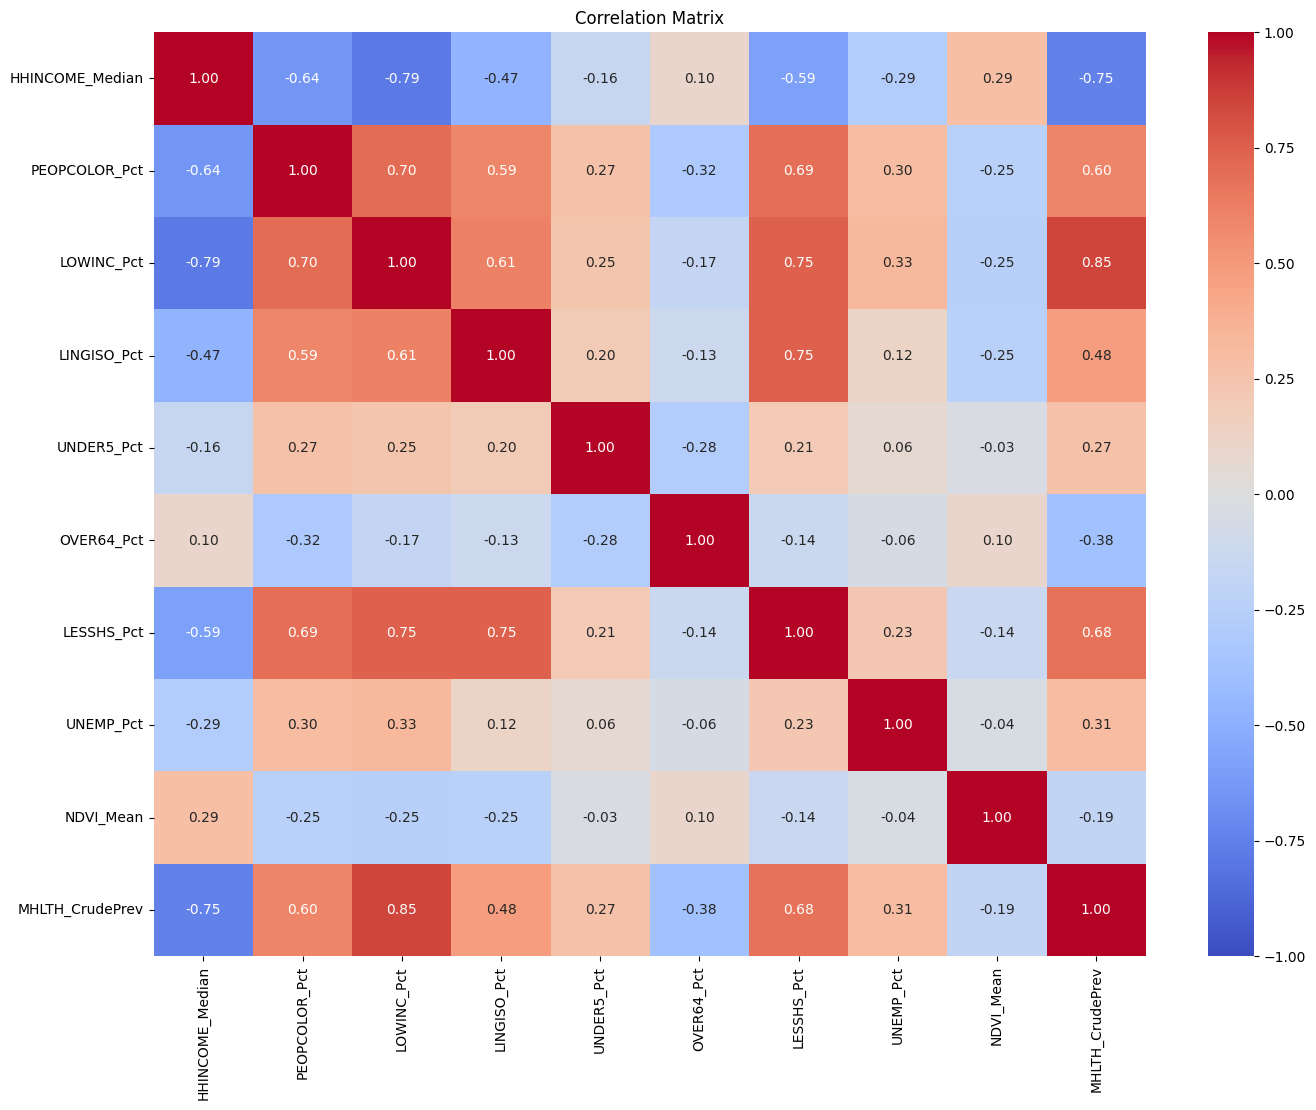

In [ ]:
corr5_df = df[selected_corr5]

plt.figure(figsize=(16, 12))
sns.heatmap(corr5_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select relevant predictors and socioeconomic factors
selected_corr6= [
      # Socioeconomic factors
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Mean',
    # Health outcomes
    'PHLTH_CrudePrev'
 ]

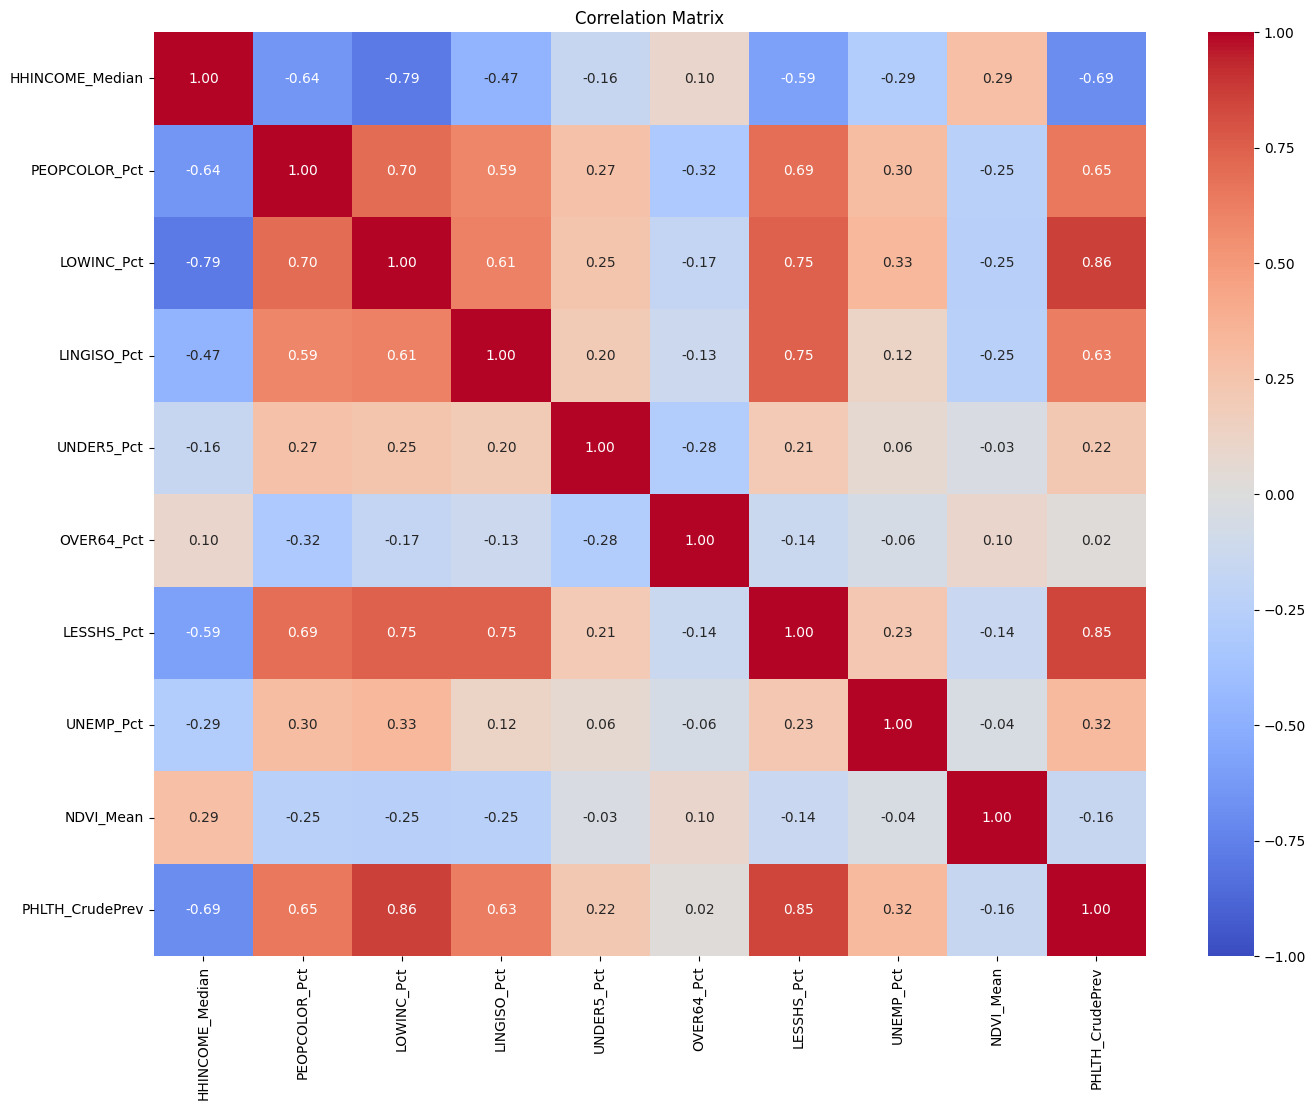

In [ ]:
corr6_df = df[selected_corr6]

plt.figure(figsize=(16, 12))
sns.heatmap(corr6_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

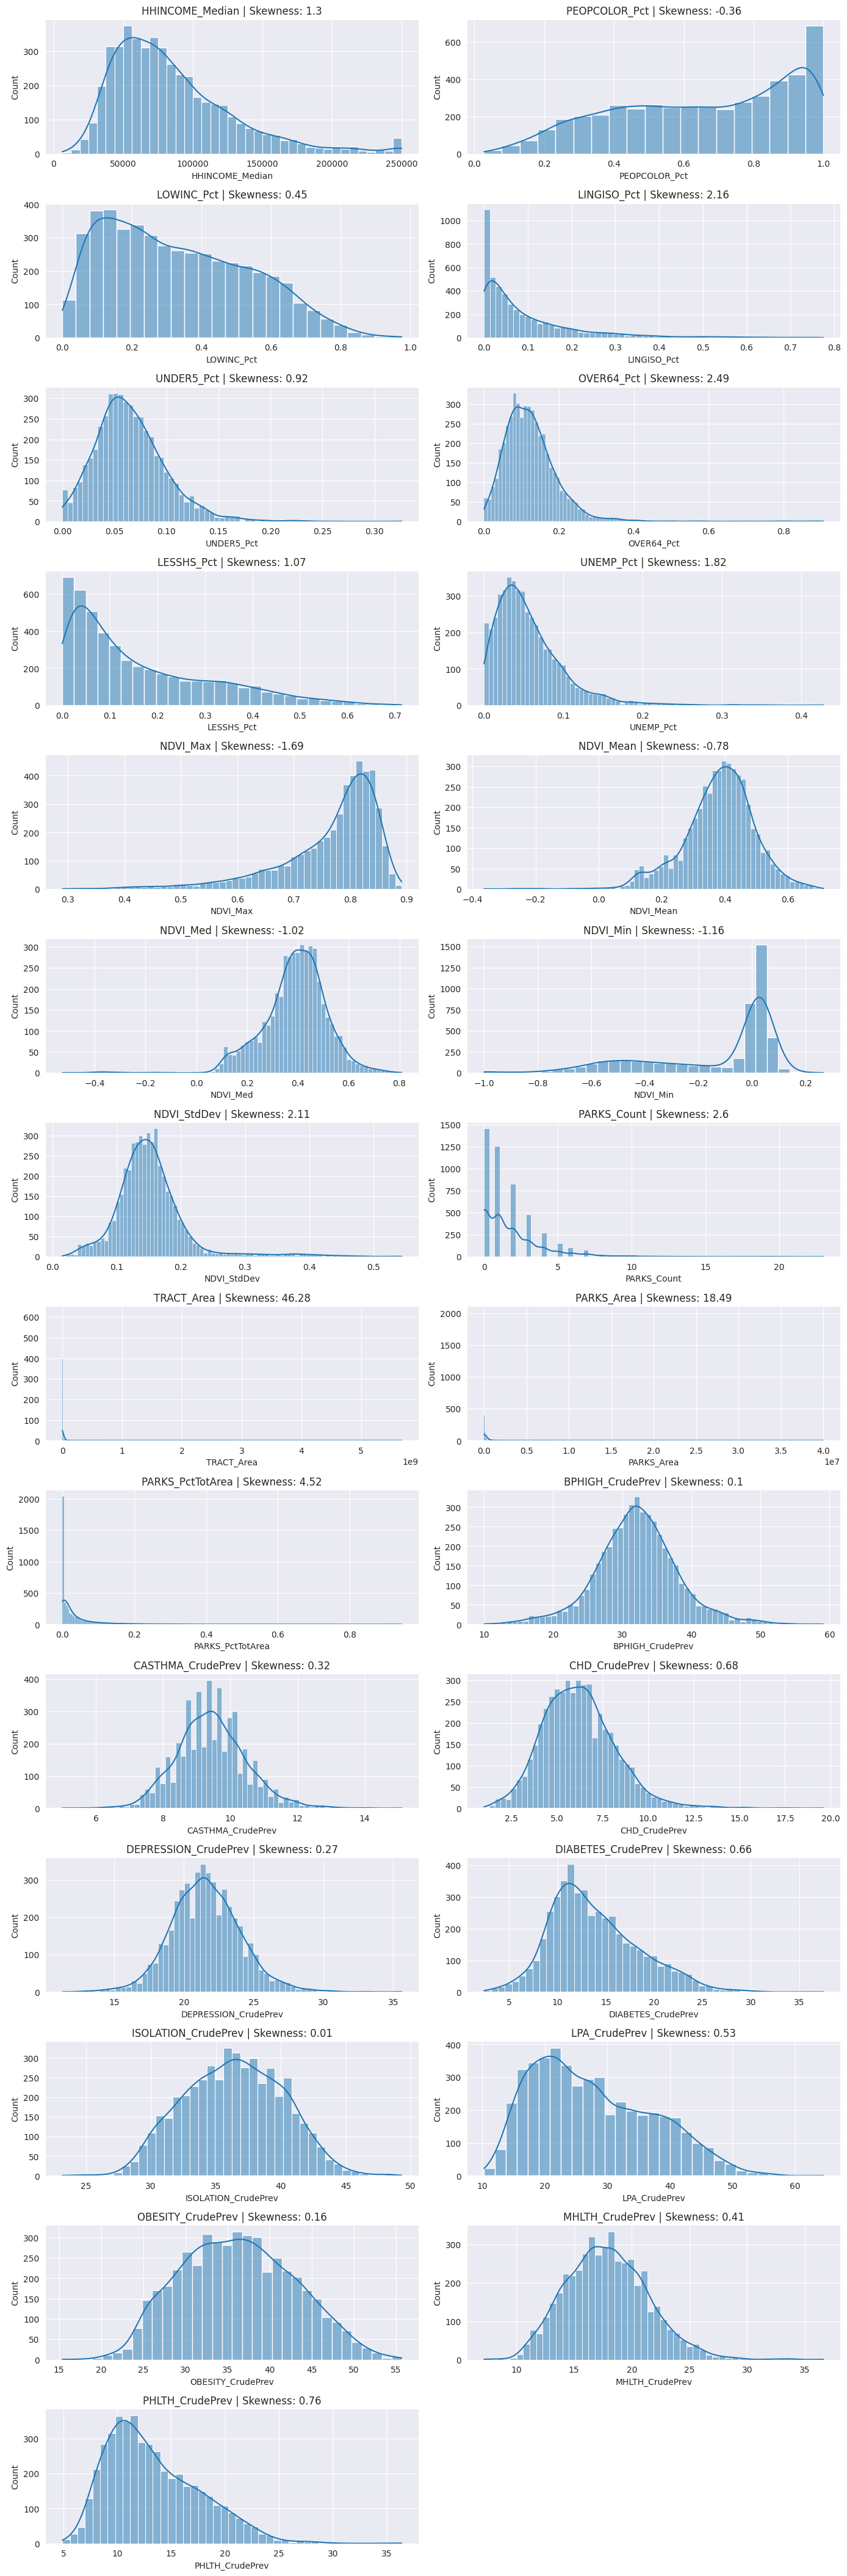

In [ ]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Define your variables of interest
variables = [
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Max',
    'NDVI_Mean',
    'NDVI_Med',
    'NDVI_Min',
    'NDVI_StdDev',
    'PARKS_Count',
    'TRACT_Area',
    'PARKS_Area',
    'PARKS_PctTotArea',
    # Health outcomes
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev'
]

# Define RGV counties
rgv_counties = ['Hidalgo', 'Cameron', 'Starr', 'Willacy']

# Filter RGV data
df_RGV = df[df['COUNTY'].isin(rgv_counties)].copy()

# Calculate summary statistics manually
summary = pd.DataFrame(index=variables)

summary['n'] = df_RGV[variables].count()
summary['mean'] = df_RGV[variables].mean()
summary['std'] = df_RGV[variables].std()
summary['min'] = df_RGV[variables].min()
summary['25%'] = df_RGV[variables].quantile(0.25)
summary['50%'] = df_RGV[variables].median()
summary['75%'] = df_RGV[variables].quantile(0.75)
summary['max'] = df_RGV[variables].max()

# Optional: Combine mean and std for presentation
summary['mean ± SD'] = summary['mean'].round(2).astype(str) + ' ± ' + summary['std'].round(2).astype(str)

# Reorder columns
summary = summary[['n', 'mean ± SD', 'min', '25%', '50%', '75%', 'max']]

# Save to CSV
summary.to_csv("RGV_summary_statistics.csv")

# Preview
print(summary.head(10))


                   n            mean ± SD           min           25%  \
HHINCOME_Median  326  54104.59 ± 21813.16  12705.000000  39116.250000   
PEOPCOLOR_Pct    326           0.92 ± 0.1      0.152866      0.893983   
LOWINC_Pct       326          0.53 ± 0.17      0.170296      0.401167   
LINGISO_Pct      326           0.18 ± 0.1      0.000000      0.107533   
UNDER5_Pct       326          0.08 ± 0.04      0.000000      0.051146   
OVER64_Pct       326          0.13 ± 0.09      0.003292      0.080580   
LESSHS_Pct       326          0.32 ± 0.15      0.027850      0.188430   
UNEMP_Pct        326          0.07 ± 0.05      0.000000      0.033894   
NDVI_Max         326          0.76 ± 0.07      0.563888      0.717821   
NDVI_Mean        326          0.38 ± 0.07     -0.250704      0.343666   

                          50%           75%            max  
HHINCOME_Median  49207.500000  66360.250000  151916.000000  
PEOPCOLOR_Pct        0.953217      0.985636       1.000000  
LOWINC_Pct   

In [ ]:
import pandas as pd
import numpy as np

# Define your variables of interest
variables = [
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Max',
    'NDVI_Mean',
    'NDVI_Med',
    'NDVI_Min',
    'NDVI_StdDev',
    'PARKS_Count',
    'TRACT_Area',
    'PARKS_Area',
    'PARKS_PctTotArea',
    # Health outcomes
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev'
]

# Calculate summary statistics manually
summary = pd.DataFrame(index=variables)

summary['n'] = df[variables].count()
summary['mean'] = df[variables].mean()
summary['std'] = df[variables].std()
summary['min'] = df[variables].min()
summary['25%'] = df[variables].quantile(0.25)
summary['50%'] = df[variables].median()
summary['75%'] = df[variables].quantile(0.75)
summary['max'] = df[variables].max()

# Optional: Combine mean and std for presentation
summary['mean ± SD'] = summary['mean'].round(2).astype(str) + ' ± ' + summary['std'].round(2).astype(str)

# Reorder columns
summary = summary[['n', 'mean ± SD', 'min', '25%', '50%', '75%', 'max']]

# Save to CSV
summary.to_csv("TXurban_summary_statistics.csv")

# Preview
print(summary.head(10))


                    n            mean ± SD          min           25%  \
HHINCOME_Median  4739  85555.13 ± 44111.86  6311.000000  53750.000000   
PEOPCOLOR_Pct    4739          0.66 ± 0.25     0.027586      0.448229   
LOWINC_Pct       4739           0.33 ± 0.2     0.000369      0.155852   
LINGISO_Pct      4739          0.09 ± 0.11     0.000000      0.015550   
UNDER5_Pct       4739          0.07 ± 0.03     0.000000      0.042252   
OVER64_Pct       4739          0.12 ± 0.07     0.000000      0.076240   
LESSHS_Pct       4739          0.16 ± 0.15     0.000000      0.042959   
UNEMP_Pct        4739          0.06 ± 0.04     0.000000      0.026533   
NDVI_Max         4739          0.76 ± 0.09     0.290086      0.728414   
NDVI_Mean        4739          0.38 ± 0.11    -0.363399      0.321321   

                          50%            75%            max  
HHINCOME_Median  75611.000000  106749.000000  250001.000000  
PEOPCOLOR_Pct        0.686275       0.889995       1.000000  
LOWINC_Pct

In [ ]:
import pandas as pd
import numpy as np

# Define your variables of interest
variables = [
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Environmental factors
    'NDVI_Max',
    'NDVI_Mean',
    'NDVI_Med',
    'NDVI_Min',
    'NDVI_StdDev',
    'PARKS_Count',
    'TRACT_Area',
    'PARKS_Area',
    'PARKS_PctTotArea',
    # Health outcomes
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev'
]

# Define TX urban counties excluding RGV
TXother_counties = ['Harris', 'Dallas', 'Tarrant', 'Bexar', 'Travis',
            'Collin', 'Denton', 'El Paso', 'Fort Bend',
            'Montgomery', 'Williamson', 'Brazoria', 'Bell',
            'Nueces', 'Galveston', 'Lubbock', 'Webb', 'Hays']

# Filter RGV data
df_TXother = df[df['COUNTY'].isin(TXother_counties)].copy()

# Calculate summary statistics manually
summary = pd.DataFrame(index=variables)

summary['n'] = df_TXother[variables].count()
summary['mean'] = df_TXother[variables].mean()
summary['std'] = df_TXother[variables].std()
summary['min'] = df_TXother[variables].min()
summary['25%'] = df_TXother[variables].quantile(0.25)
summary['50%'] = df_TXother[variables].median()
summary['75%'] = df_TXother[variables].quantile(0.75)
summary['max'] = df_TXother[variables].max()

# Optional: Combine mean and std for presentation
summary['mean ± SD'] = summary['mean'].round(2).astype(str) + ' ± ' + summary['std'].round(2).astype(str)

# Reorder columns
summary = summary[['n', 'mean ± SD', 'min', '25%', '50%', '75%', 'max']]

# Save to CSV
summary.to_csv("TXother_summary_statistics.csv")

# Preview
print(summary.head(10))


                    n            mean ± SD          min           25%  \
HHINCOME_Median  4413  87878.46 ± 44453.34  6311.000000  55375.000000   
PEOPCOLOR_Pct    4413          0.64 ± 0.25     0.027586      0.432579   
LOWINC_Pct       4413           0.32 ± 0.2     0.000369      0.149366   
LINGISO_Pct      4413          0.09 ± 0.11     0.000000      0.013692   
UNDER5_Pct       4413          0.06 ± 0.03     0.000000      0.041803   
OVER64_Pct       4413          0.12 ± 0.07     0.000000      0.075954   
LESSHS_Pct       4413          0.15 ± 0.14     0.000000      0.039372   
UNEMP_Pct        4413          0.05 ± 0.04     0.000000      0.026124   
NDVI_Max         4413          0.76 ± 0.09     0.290086      0.729397   
NDVI_Mean        4413          0.38 ± 0.12    -0.363399      0.317770   

                          50%            75%            max  
HHINCOME_Median  78013.000000  109250.000000  250001.000000  
PEOPCOLOR_Pct        0.656472       0.867120       1.000000  
LOWINC_Pct

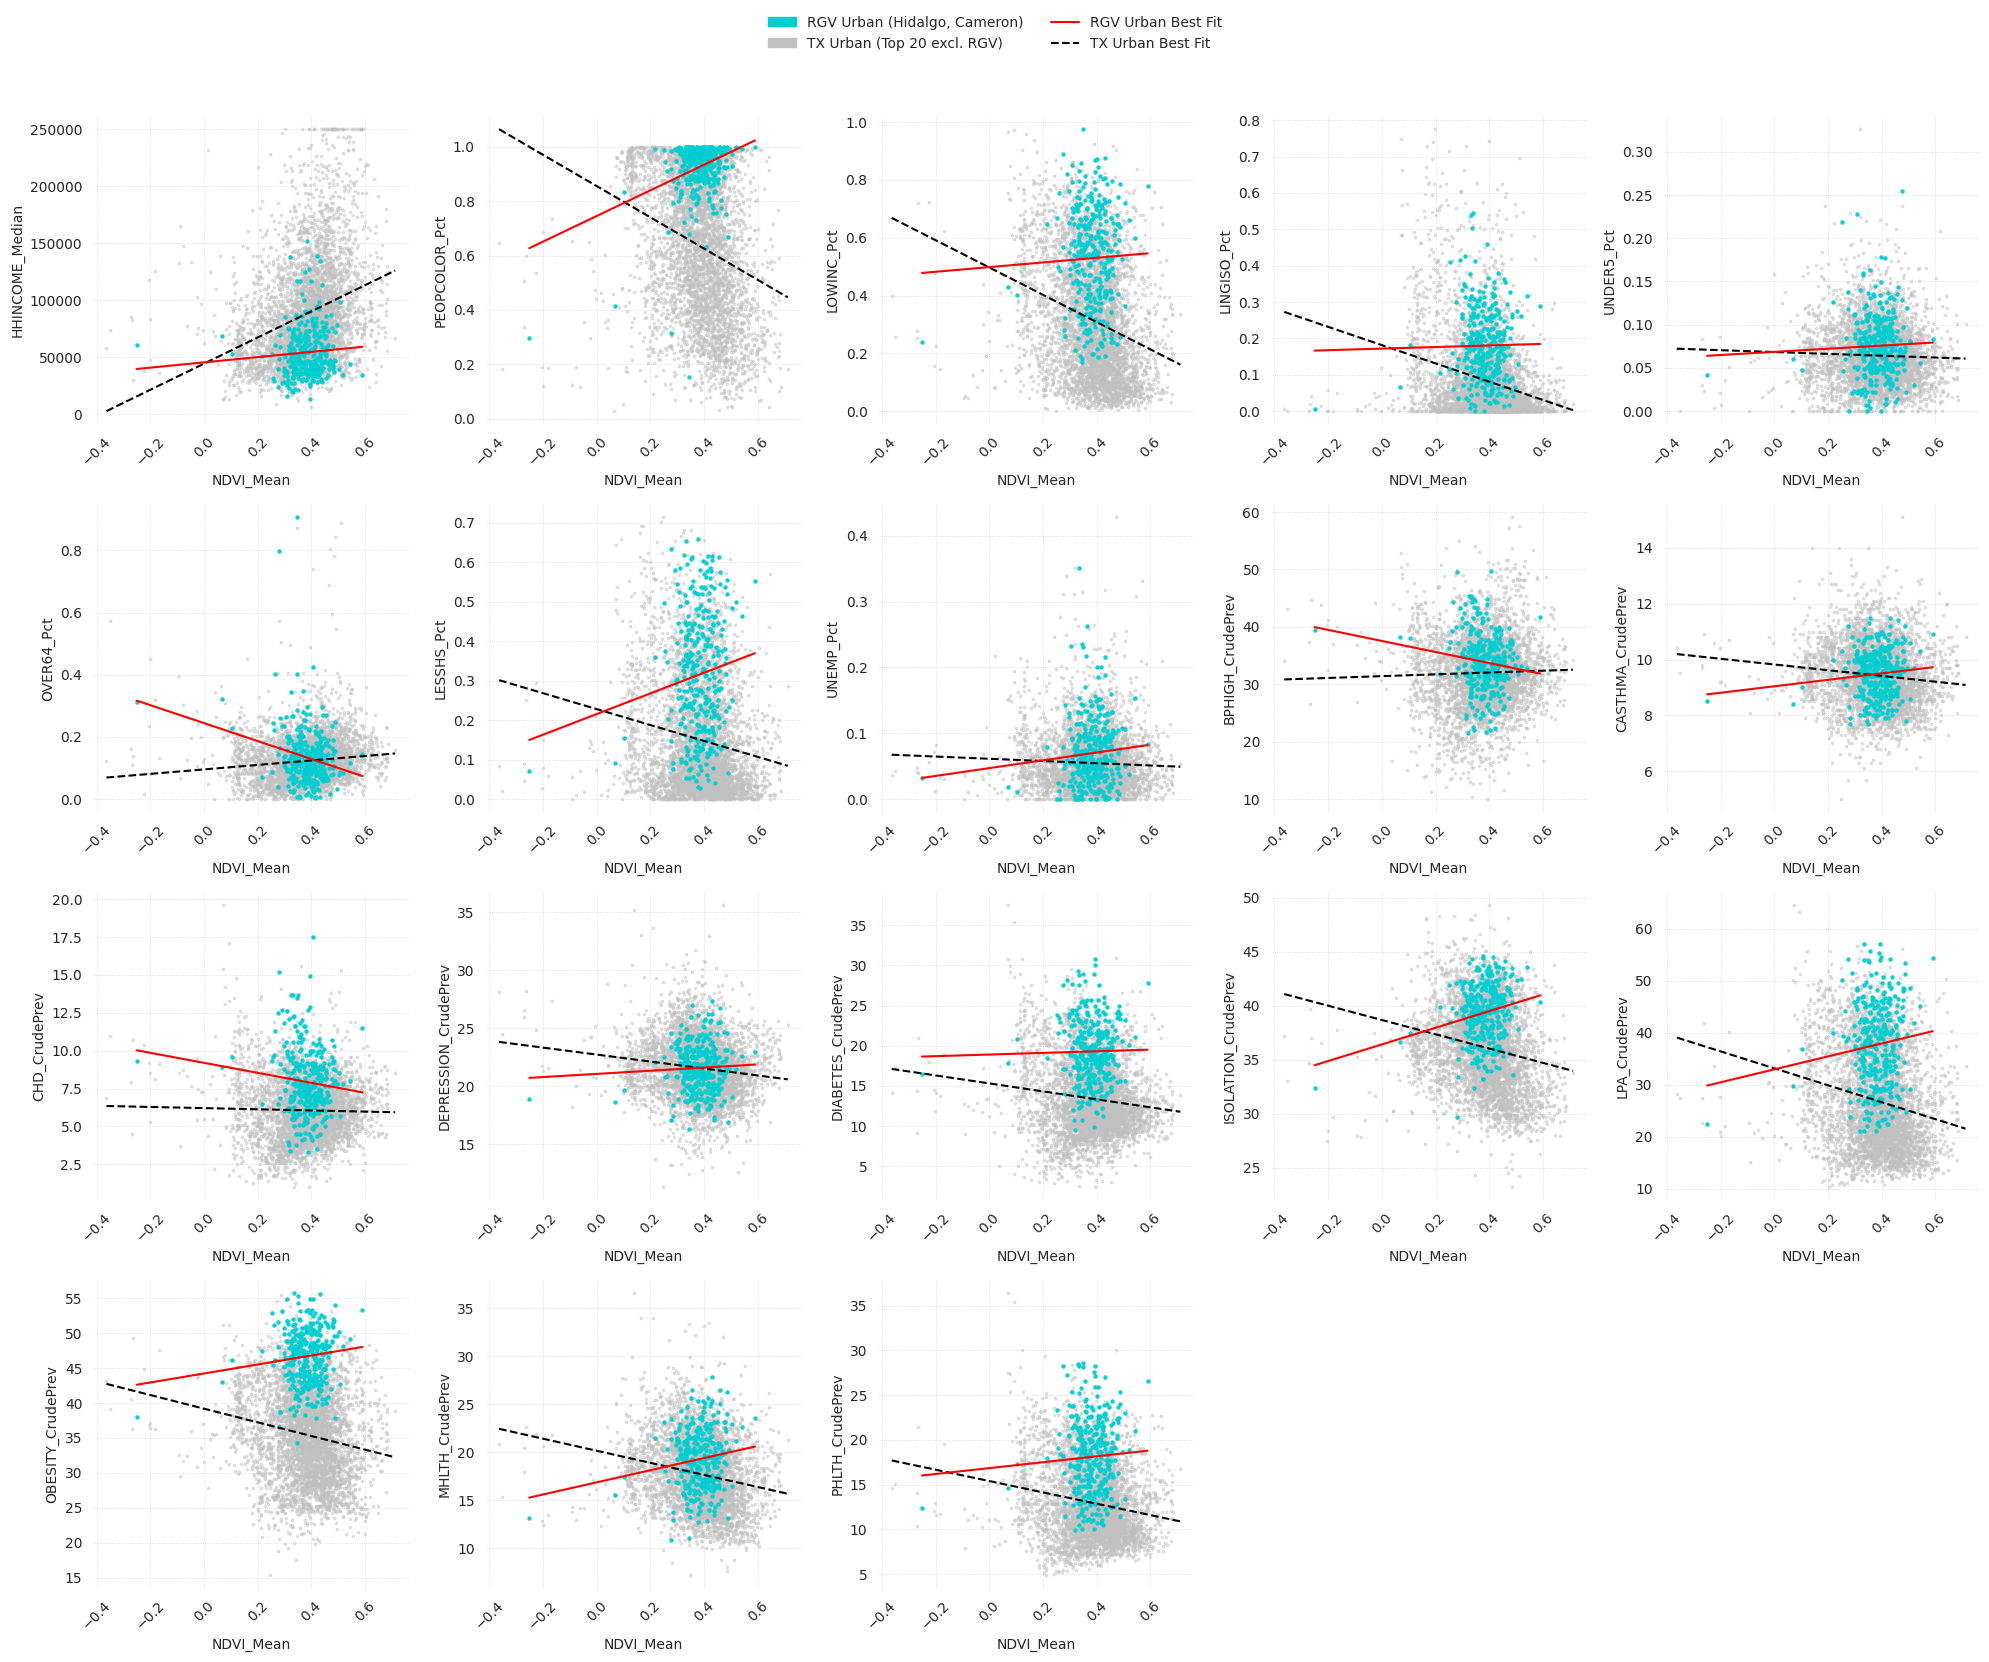

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Initial exploratory analysis comparing green space vs. select health indicators

# Define RGV urban counties (Hidalgo, Cameron)
rgv_urban_counties = ['Hidalgo', 'Cameron']

# Define TX urban counties (top 20 excluding Hidalgo and Cameron)
tx_urban_counties = [
    'Harris', 'Dallas', 'Tarrant', 'Bexar', 'Travis', 'Collin', 'Denton',
    'El Paso', 'Fort Bend', 'Montgomery', 'Williamson', 'Brazoria', 'Bell',
    'Nueces', 'Galveston', 'Lubbock', 'Webb', 'Hays'
]

# Split the data
rgv_urban = df[df['COUNTY'].isin(rgv_urban_counties)]
tx_urban = df[df['COUNTY'].isin(tx_urban_counties)]

# Set variables
y_vars = [
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    # Health outcomes
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev'
]

x_var = 'NDVI_Mean'

# Define grid shape
n_cols = 5
n_rows = 4

# Create subplots in a grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Set white background
fig.patch.set_facecolor('white')
for ax in axes:
    ax.set_facecolor('white')

# Plot each variable with regression lines
for i, y in enumerate(y_vars):
    ax = axes[i]

    # Plot for TX urban counties (excluding Hidalgo and Cameron)
    sns.regplot(
        data=tx_urban, x=x_var, y=y, ax=ax,
        scatter=True, color='silver',
        scatter_kws={'alpha': 0.4, 's': 3},
        line_kws={'color': 'black', 'linewidth': 1.5, 'linestyle': '--'},
        ci=None
    )

    # Plot for RGV urban counties (Hidalgo, Cameron)
    sns.regplot(
        data=rgv_urban, x=x_var, y=y, ax=ax,
        scatter=True, color='darkturquoise',
        scatter_kws={'alpha': 0.9, 's': 5},
        line_kws={'color': 'red', 'linewidth': 1.5, 'linestyle': '-'},
        ci=None
    )

    # Remove subplot titles
    ax.set_title('')
    ax.grid(True, linestyle=':', linewidth=.6, alpha=.3, color='gray')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(y_vars), len(axes)):
    fig.delaxes(axes[j])

# Custom legend: patches + line styles
rgv_patch = mpatches.Patch(color='darkturquoise', label='RGV Urban (Hidalgo, Cameron)')
tx_patch = mpatches.Patch(color='silver', label='TX Urban (Top 20 excl. RGV)')
rgv_line = Line2D([0], [0], color='red', linestyle='-', linewidth=1.5, label='RGV Urban Best Fit')
tx_line = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='TX Urban Best Fit')

fig.legend(
    handles=[rgv_patch, tx_patch, rgv_line, tx_line],
    loc='upper center', bbox_to_anchor=(0.5, 1.04),
    ncol=2, frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Section 4 - Exploratory Spatial Data Analysis (ESDA)

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
import libpysal
import esda
import libpysal.weights as weights
from esda.moran import Moran
import spreg
from splot.libpysal import plot_spatial_weights

## 4.0 - Spatial Data Processing and Mapping

Loading census tract geometries from Google Earth Engine...
This may take a few minutes...

Loaded 17516 census tracts from Earth Engine
Columns in GeoDataFrame: ['geometry', 'ALAND', 'AWATER', 'COUNTYFP', 'FUNCSTAT', 'GEOID', 'INTPTLAT', 'INTPTLON', 'MTFCC', 'NAME', 'NAMELSAD', 'STATEFP', 'TRACTCE']

Loading Texas state boundary...
Loaded Texas state boundary

Sample GEOIDs from shapefile:
0    48453001000
1    48453001200
2    48027020500
3    48027020800
4    48491020900
Name: GEOID, dtype: object

Sample GEOIDs from your data:
58211    48027020101
58212    48027020102
58213    48027020201
58214    48027020203
58215    48027020204
Name: GEOID, dtype: object

Merging geometries with data...

Merged GeoDataFrame has 17307 tracts
Shape: (17307, 41)

Checking merge results:
Tracts in shapefile: 17516
Tracts in merged data: 17307
Tracts not matched: 209

Final GeoDataFrame CRS: EPSG:4326

Tracts by county:
COUNTY
Harris        3886
Dallas        3059
Travis         969
El Paso        909

/tmp/ipython-input-3696953216.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GEOID'] = df['GEOID'].astype(str)
/tmp/ipython-input-3696953216.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GEOID'] = df['GEOID'].str.zfill(11)  # Pad to 11 digits


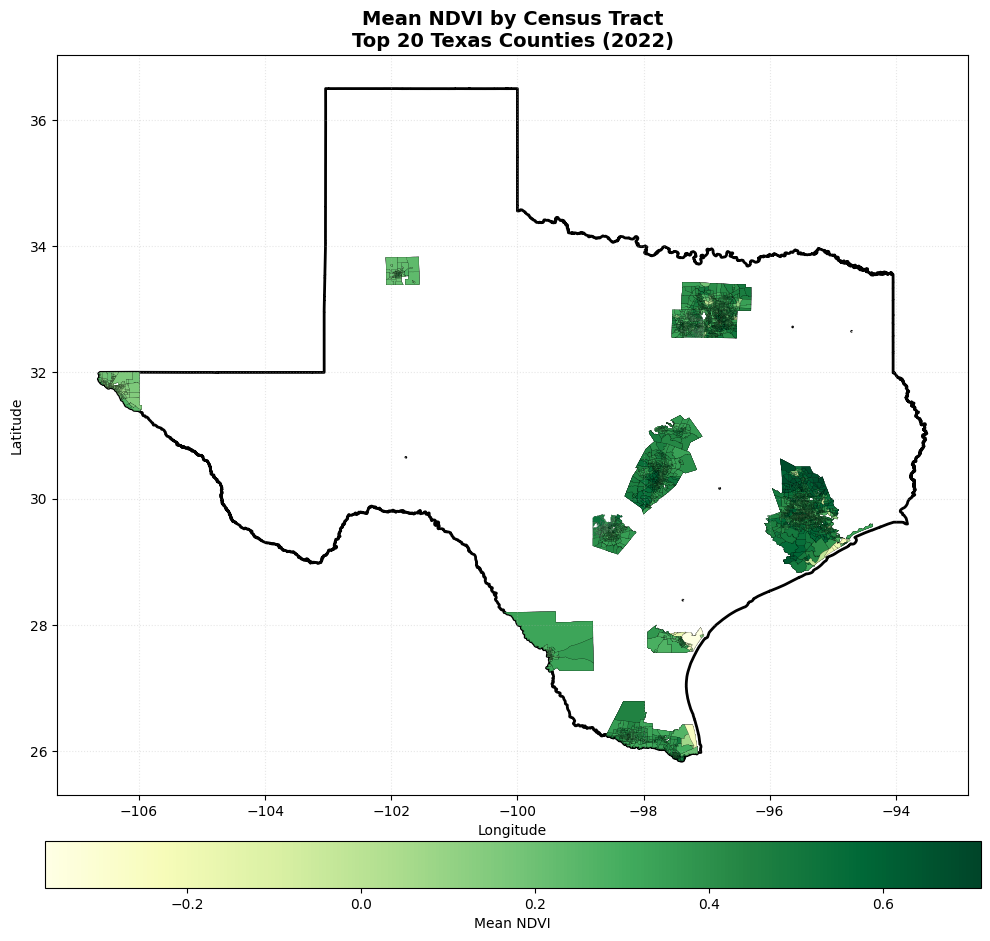


Saving merged GeoDataFrame...
Saved as 'tx_top20_tracts_merged.geojson'
Also saved as 'tx_top20_tracts_merged.pkl'

✓ Done! Your GeoDataFrame 'gdf' is ready for spatial analysis.
Final shape: (17307, 41)
Columns: 41


In [24]:
import geopandas as gpd
import pandas as pd
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine (if not already done)
ee.Initialize(project='rgv-envirohealth')

# Step 1: Load census tract data from Google Earth Engine
print("Loading census tract geometries from Google Earth Engine...")
tracts_ee = ee.FeatureCollection('TIGER/2020/TRACT')

# Define top 20 counties only (no Willacy or Starr)
top_20_county_fips = [
    '201',  # Harris
    '113',  # Dallas
    '439',  # Tarrant
    '029',  # Bexar
    '453',  # Travis
    '085',  # Collin
    '121',  # Denton
    '215',  # Hidalgo
    '141',  # El Paso
    '157',  # Fort Bend
    '339',  # Montgomery
    '491',  # Williamson
    '061',  # Cameron
    '039',  # Brazoria
    '027',  # Bell
    '355',  # Nueces
    '167',  # Galveston
    '303',  # Lubbock
    '479',  # Webb
    '209'   # Hays
]

# Filter tracts for top 20 counties (Texas = STATEFP '48')
tracts_filtered = tracts_ee.filter(
    ee.Filter.And(
        ee.Filter.eq('STATEFP', '48'),
        ee.Filter.inList('COUNTYFP', top_20_county_fips)
    )
)

print("Downloading census tract geometries...")
print("This may take a few minutes...")

# Step 2: Convert Earth Engine FeatureCollection to GeoDataFrame
gdf_tracts = geemap.ee_to_gdf(tracts_filtered)

print(f"\nLoaded {len(gdf_tracts)} census tracts from Earth Engine")
print("Columns in GeoDataFrame:", gdf_tracts.columns.tolist())

# Step 3: Load Texas state boundary for visualization
print("\nLoading Texas state boundary...")
counties_ee = ee.FeatureCollection("TIGER/2018/Counties")
texas_ee = counties_ee.filter(ee.Filter.eq("STATEFP", "48"))
gdf_texas = geemap.ee_to_gdf(texas_ee)

# Dissolve all counties into one Texas boundary
gdf_texas_boundary = gdf_texas.dissolve()

print(f"Loaded Texas state boundary")

# Step 4: Ensure your dataframe GEOID is string and same format
# Assuming your main dataframe is called 'df'
df['GEOID'] = df['GEOID'].astype(str)
df['GEOID'] = df['GEOID'].str.zfill(11)  # Pad to 11 digits

print("\nSample GEOIDs from shapefile:")
print(gdf_tracts['GEOID'].head())
print("\nSample GEOIDs from your data:")
print(df['GEOID'].head())

# Step 5: Merge the GeoDataFrame with your data
print("\nMerging geometries with data...")
gdf = gdf_tracts.merge(df, on='GEOID', how='inner')

print(f"\nMerged GeoDataFrame has {len(gdf)} tracts")
print(f"Shape: {gdf.shape}")

# Step 6: Verify the merge
print("\nChecking merge results:")
print(f"Tracts in shapefile: {len(gdf_tracts)}")
print(f"Tracts in merged data: {len(gdf)}")
print(f"Tracts not matched: {len(gdf_tracts) - len(gdf)}")

# Step 7: Clean up duplicate columns from merge
if 'COUNTYFP_x' in gdf.columns and 'COUNTYFP_y' in gdf.columns:
    gdf = gdf.drop('COUNTYFP_y', axis=1)
    gdf = gdf.rename(columns={'COUNTYFP_x': 'COUNTYFP'})

if 'COUNTY_x' in gdf.columns and 'COUNTY_y' in gdf.columns:
    gdf = gdf.drop('COUNTY_x', axis=1)
    gdf = gdf.rename(columns={'COUNTY_y': 'COUNTY'})

if 'STATEFP_x' in gdf.columns and 'STATEFP_y' in gdf.columns:
    gdf = gdf.drop('STATEFP_y', axis=1)
    gdf = gdf.rename(columns={'STATEFP_x': 'STATEFP'})

# Step 8: Ensure proper CRS
if gdf.crs is None:
    gdf = gdf.set_crs('EPSG:4326')
if gdf_texas_boundary.crs is None:
    gdf_texas_boundary = gdf_texas_boundary.set_crs('EPSG:4326')

print(f"\nFinal GeoDataFrame CRS: {gdf.crs}")

# Step 9: Summary by county
print("\nTracts by county:")
county_counts = gdf.groupby('COUNTY').size().sort_values(ascending=False)
print(county_counts)

# Step 10: Visualize NDVI_Mean by census tract with Texas outline
print("\nCreating visualization...")

fig, ax = plt.subplots(figsize=(12, 10))

# Plot Texas state boundary first (background) with transparent fill
gdf_texas_boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2, label='Texas')

# Plot census tracts colored by NDVI_Mean
gdf.plot(
    column='NDVI_Mean',
    cmap='YlGn',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.1,
    legend_kwds={
        'label': 'Mean NDVI',
        'orientation': 'horizontal',
        'shrink': 0.8,
        'pad': 0.05
    }
)

ax.set_title('Mean NDVI by Census Tract\nTop 20 Texas Counties (2022)', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

# Add grid
ax.grid(True, linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

# Step 11: Save the merged GeoDataFrame
print("\nSaving merged GeoDataFrame...")
gdf.to_file('tx_top20_tracts_merged.geojson', driver='GeoJSON')
print("Saved as 'tx_top20_tracts_merged.geojson'")

# Also save as pickle for faster loading
gdf.to_pickle('tx_top20_tracts_merged.pkl')
print("Also saved as 'tx_top20_tracts_merged.pkl'")

print("\n✓ Done! Your GeoDataFrame 'gdf' is ready for spatial analysis.")
print(f"Final shape: {gdf.shape}")
print(f"Columns: {len(gdf.columns)}")

In [25]:
import folium
import branca.colormap as cm

# Create base map
m = folium.Map(location=[26.3, -98.2], zoom_start=10)

# Filter to Hidalgo County
hidalgo_gdf = gdf[gdf['COUNTY'] == 'Hidalgo'].copy()

# Define all variables to display
variables = [
    'HHINCOME_Median',
    'PEOPCOLOR_Pct',
    'LOWINC_Pct',
    'LINGISO_Pct',
    'UNDER5_Pct',
    'OVER64_Pct',
    'LESSHS_Pct',
    'UNEMP_Pct',
    'BPHIGH_CrudePrev',
    'CASTHMA_CrudePrev',
    'CHD_CrudePrev',
    'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev',
    'ISOLATION_CrudePrev',
    'LPA_CrudePrev',
    'OBESITY_CrudePrev',
    'MHLTH_CrudePrev',
    'PHLTH_CrudePrev',
    'NDVI_Mean'
]

# Add choropleth for each variable
for var in variables:
    if var in hidalgo_gdf.columns:
        # Create color map
        colormap = cm.linear.YlOrRd_09.scale(
            hidalgo_gdf[var].min(),
            hidalgo_gdf[var].max()
        )

        # Create GeoJson layer
        layer = folium.GeoJson(
            hidalgo_gdf,
            name=var,
            style_function=lambda feature, var=var, colormap=colormap: {
                'fillColor': colormap(feature['properties'][var]) if feature['properties'][var] is not None else 'gray',
                'color': 'black',
                'weight': 0.5,
                'fillOpacity': 0.7
            },
            tooltip=folium.GeoJsonTooltip(fields=[var], aliases=[var])
        )
        layer.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display
display(m)

Output hidden; open in https://colab.research.google.com to view.

## 4.1 - Estimating Moran's I for Heart Disease




In [86]:
## Establish data variables
socioeconomic = ['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct']
locational = ['NDVI_Mean']
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_CHD = hidalgo_gdf[['CHD_CrudePrev']].values

In [81]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_CHD,  w_qu)
morans_i_knn = Moran(y_CHD,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.31161703536154756 -0.001440922190201729 1.6581699495601568e-178
KNN Contiguity Moran's I:  0.5699270648575605 -0.001440922190201729 7.723230836949342e-235


## 4.2 - Estimating Moran's I for Diabetes

In [87]:
## Establish data variables
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_DBS = hidalgo_gdf[['DIABETES_CrudePrev']].values

In [88]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_DBS,  w_qu)
morans_i_knn = Moran(y_DBS,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.34982467348715124 -0.001440922190201729 3.3802172215593915e-224
KNN Contiguity Moran's I:  0.5889174813356902 -0.001440922190201729 1.4513439855058475e-250


## 4.3 - Estimating Moran's I for Obesity

In [93]:
## Establish data variables
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_OBE = hidalgo_gdf[['OBESITY_CrudePrev']].values

In [94]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_OBE,  w_qu)
morans_i_knn = Moran(y_OBE,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.38683370178444393 -0.001440922190201729 1.8666287426565324e-273
KNN Contiguity Moran's I:  0.5998808006891468 -0.001440922190201729 7.068699903579857e-260


## 4.4 - Estimating Moran's I for Depression

In [110]:
## Establish data variables
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_DEP = hidalgo_gdf[['DEPRESSION_CrudePrev']].values

In [111]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_DEP,  w_qu)
morans_i_knn = Moran(y_DEP,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.39369767664908134 -0.001440922190201729 3.9289399696389604e-283
KNN Contiguity Moran's I:  0.5965262217569507 -0.001440922190201729 5.211208632912172e-257


## 4.5 - Estimating Moran's I for Overall Physical Health

In [115]:
## Establish data variables
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_PHLTH = hidalgo_gdf[['PHLTH_CrudePrev']].values

In [120]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_PHLTH,  w_qu)
morans_i_knn = Moran(y_PHLTH,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.356201432432813 -0.001440922190201729 2.469426134942e-232
KNN Contiguity Moran's I:  0.5847016832941245 -0.001440922190201729 4.979741592766425e-247


## 4.6 - Estimating Moran's I for Overall Mental Health

In [121]:
## Establish data variables
X = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values
y_MHLTH = hidalgo_gdf[['MHLTH_CrudePrev']].values

In [122]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_MHLTH,  w_qu)
morans_i_knn = Moran(y_MHLTH,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.43537778709765235 -0.001440922190201729 0.0
KNN Contiguity Moran's I:  0.6467248100872786 -0.001440922190201729 1.3560218584175827e-301


## 4.7 - Estimating Moran's I for NDVI

In [127]:
## Establish data variables
y_NDVI = hidalgo_gdf[['NDVI_Mean']].values

In [128]:
# Create spatial weights that respect non-contiguity
from libpysal.weights import Queen, KNN
import geopandas as gpd

# Queen contiguity (neighbors only within contiguous regions)
w_qu = Queen.from_dataframe(hidalgo_gdf, use_index=True)

# K-nearest neighbors (works across gaps and with sparse data)
w_knn = KNN.from_dataframe(hidalgo_gdf, k=8)

# Calculate Moran's I
from esda.moran import Moran

morans_i_queen = Moran(y_NDVI,  w_qu)
morans_i_knn = Moran(y_NDVI,  w_knn)

print("Queen's Contiguity Moran's I: ", morans_i_queen.I, morans_i_queen.EI, morans_i_queen.p_norm)
print("KNN Contiguity Moran's I: ", morans_i_knn.I, morans_i_knn.EI, morans_i_knn.p_norm)

Queen's Contiguity Moran's I:  0.4383605237087893 -0.001440922190201729 0.0
KNN Contiguity Moran's I:  0.709184726713235 -0.001440922190201729 0.0


## 4.8 - Cluster Analysis

In [130]:
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran, Moran_Local
import matplotlib.pyplot as plt
from splot.esda import lisa_cluster

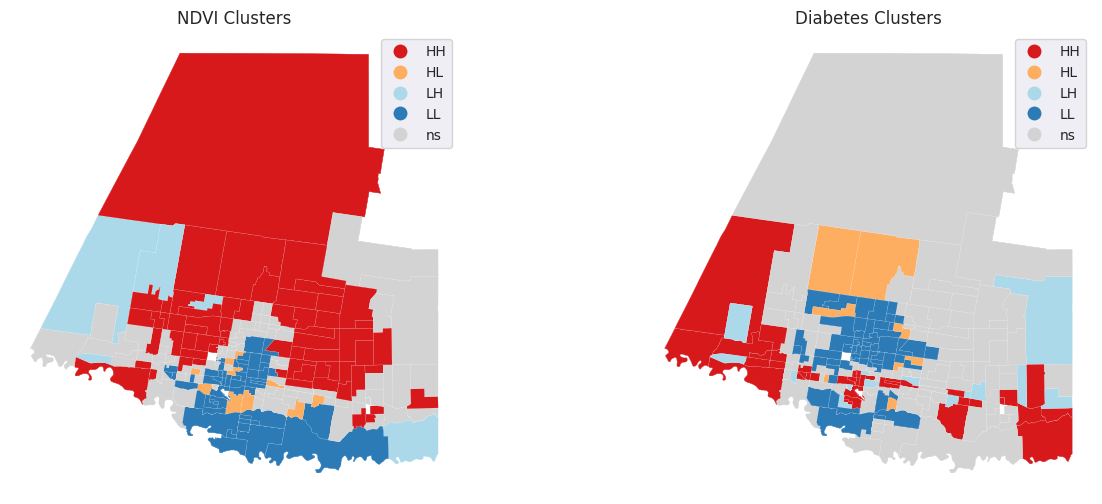

In [135]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_diabetes = Moran_Local(hidalgo_gdf['DIABETES_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_diabetes, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('Diabetes Clusters')
plt.show()

In [136]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['DIABETES_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high diabetes tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low diabetes tracts (negative spatial association/protective)

Bivariate Moran's I: -0.10057511795075327, p-value: 0.001


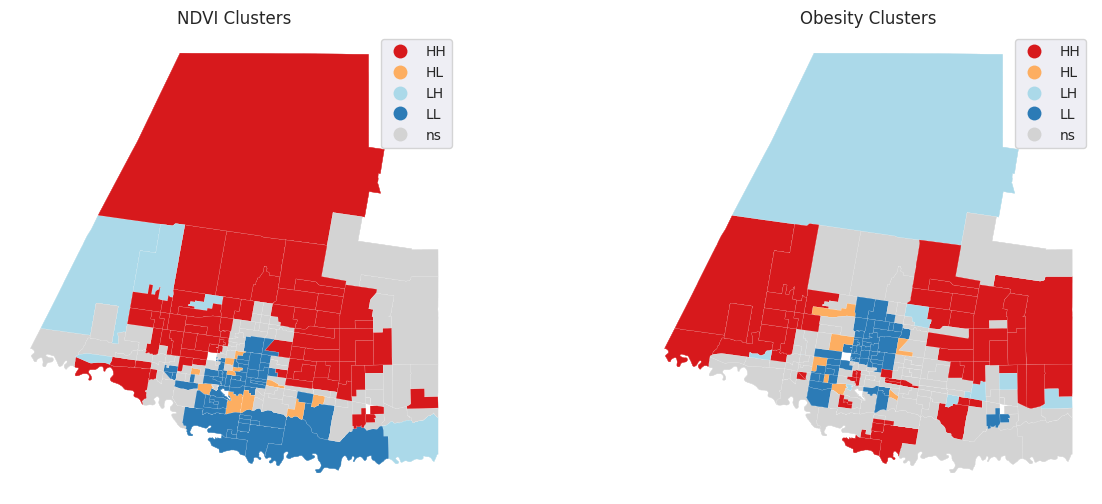

In [139]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_obesity = Moran_Local(hidalgo_gdf['OBESITY_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_obesity, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('Obesity Clusters')
plt.show()

In [138]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['OBESITY_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high obesity tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low obesity tracts (negative spatial association/protective)

Bivariate Moran's I: 0.04735347442384602, p-value: 0.029


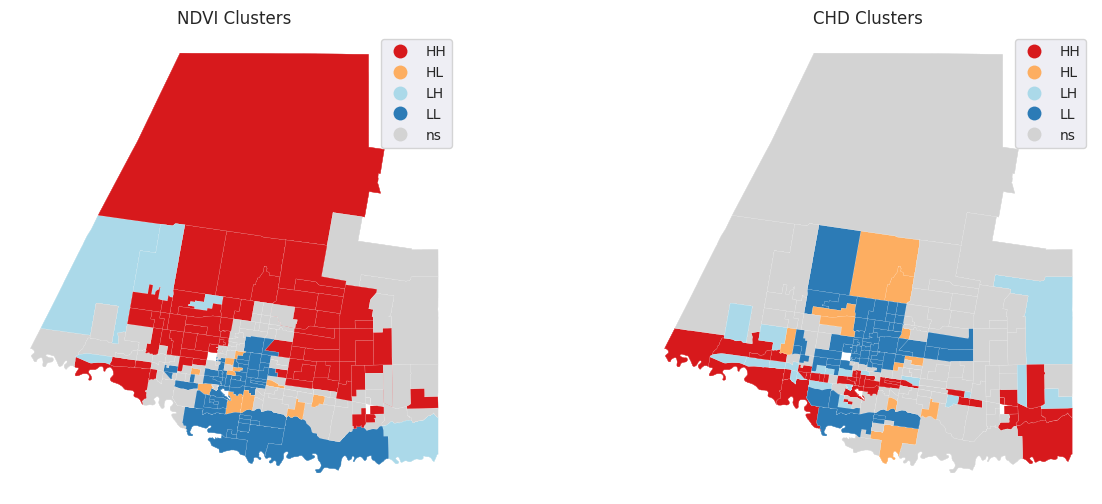

In [140]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_chd = Moran_Local(hidalgo_gdf['CHD_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_chd, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('CHD Clusters')
plt.show()

In [141]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['CHD_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high CHD tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low CHD tracts (negative spatial association/protective)

Bivariate Moran's I: -0.1212024209758657, p-value: 0.001


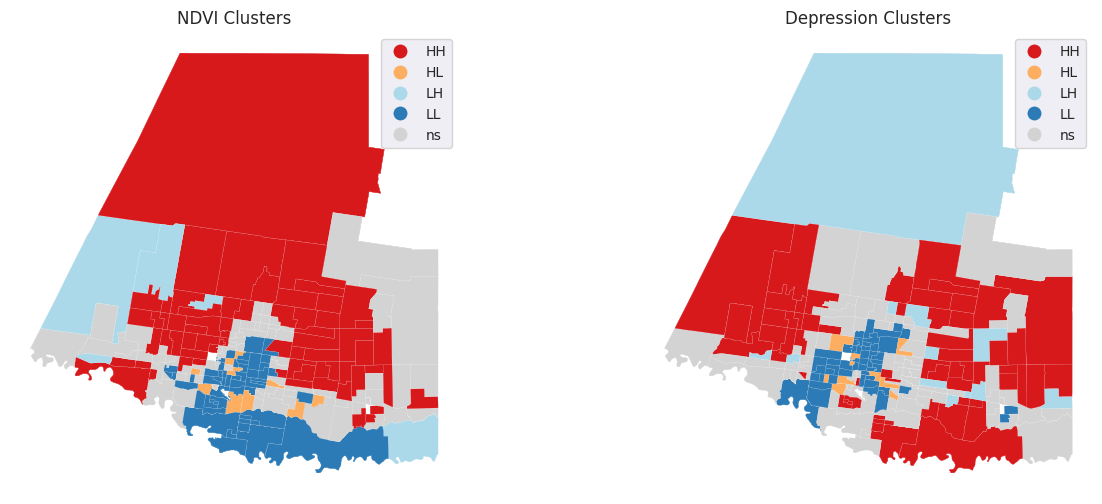

In [142]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_dep = Moran_Local(hidalgo_gdf['DEPRESSION_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_dep, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('Depression Clusters')
plt.show()

In [143]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['DEPRESSION_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high depression tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low depression tracts (negative spatial association/protective)

Bivariate Moran's I: 0.1352425762025456, p-value: 0.001


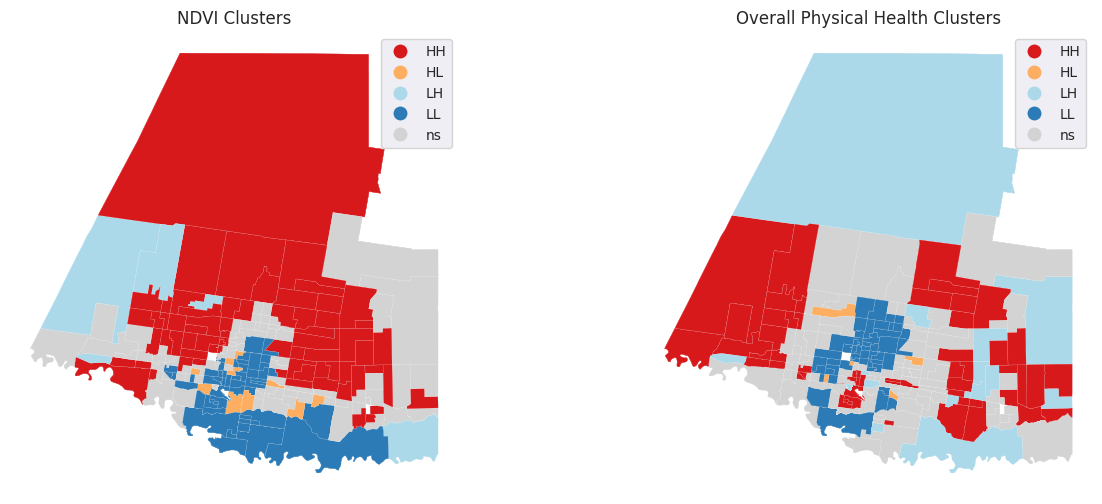

In [145]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_phlth = Moran_Local(hidalgo_gdf['PHLTH_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_phlth, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('Overall Physical Health Clusters')
plt.show()

In [146]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['PHLTH_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high PHLTH tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low PHLTH tracts (negative spatial association)

Bivariate Moran's I: 0.0060442621407899196, p-value: 0.44


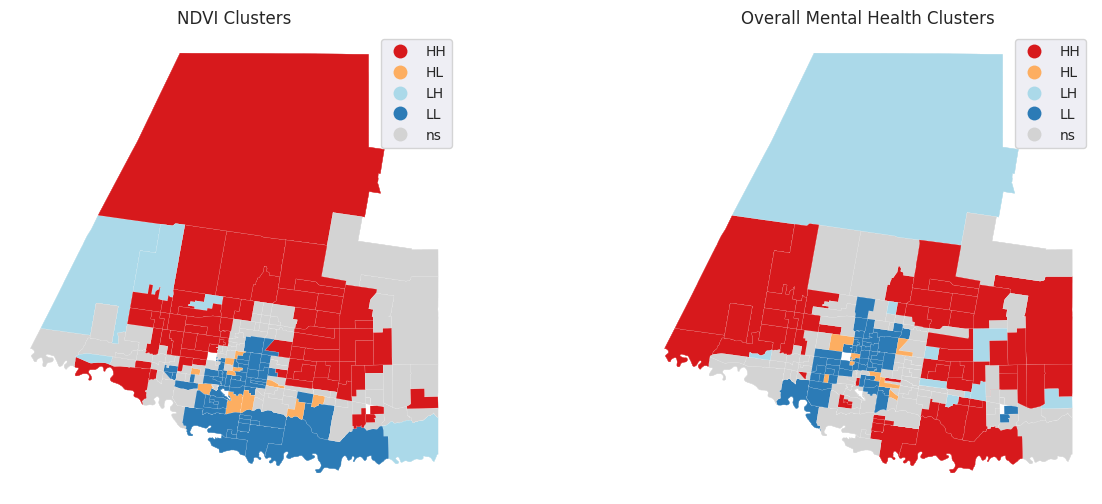

In [147]:
# Local Moran's I (LISA) - identifies clusters
lisa_ndvi = Moran_Local(hidalgo_gdf['NDVI_Mean'], w_qu)
lisa_mhlth = Moran_Local(hidalgo_gdf['MHLTH_CrudePrev'], w_qu)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
lisa_cluster(lisa_ndvi, hidalgo_gdf, p=0.05, ax=axes[0])
axes[0].set_title('NDVI Clusters')
lisa_cluster(lisa_mhlth, hidalgo_gdf, p=0.05, ax=axes[1])
axes[1].set_title('Overall Mental Health Clusters')
plt.show()

In [148]:
from esda.moran import Moran_BV

# Bivariate Moran's I: Does NDVI clustering relate to health outcome clustering?
moran_bv = Moran_BV(hidalgo_gdf['NDVI_Mean'], hidalgo_gdf['MHLTH_CrudePrev'], w_qu)
print(f"Bivariate Moran's I: {moran_bv.I}, p-value: {moran_bv.p_sim}")

# Interpretation:
# Positive I = High NDVI tracts neighbor high MHLTH tracts (positive spatial association)
# Negative I = High NDVI tracts neighbor low MHLTH tracts (negative spatial association)

Bivariate Moran's I: 0.133077638111557, p-value: 0.001


# Section 5 - Spatial Regression Analysis


In [150]:
from spreg import OLS, ML_Lag, ML_Error, GM_Combo

### 5.1 - Modeling Influences on Heart Disease

In [155]:
# Standard OLS (for comparison)
ols_CHD = OLS(y_CHD, X, w_qu, name_y='CHD_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_CHD.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :CHD_CrudePrev                Number of Observations:         695
Mean dependent var  :      7.8207                Number of Variables   :           6
S.D. dependent var  :      2.2947                Degrees of Freedom    :         689
R-squared           :      0.5766
Adjusted R-squared  :      0.5736
Sum squared residual:     1547.08                F-statistic           :    187.6960
Sigma-square        :       2.245                Prob(F-statistic)     :  5.329e-126
S.E. of regression  :       1.498                Log likelihood        :   -1264.236
Sigma-square ML     :       2.226                Akaike info criterion :    2540.472
S.E of regression ML:      1.4920                Schwarz criterion     :    2567.736

-----------------------------------------------------------

In [157]:
# Check clustering on OLS residuals
r_ols_CHD = ols_CHD.u
morans_i = Moran(r_ols_CHD, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.21652361979412105 -0.001440922190201729 1.501289549453401e-87


In [82]:
mllag_CHD = spreg.ML_Lag(y_CHD, X, w_qu, name_y='CHD_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_CHD.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :CHD_CrudePrev                Number of Observations:         695
Mean dependent var  :      7.8207                Number of Variables   :           7
S.D. dependent var  :      2.2947                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6496
Spatial Pseudo R-squared:  0.5719
Log likelihood      :  -1203.8057
Sigma-square ML     :      1.8426                Akaike info criterion :    2421.611
S.E of regression   :      1.3574                Schwarz criterion     :    2453.419

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------------------------------------------

In [83]:
mlerror_CHD = spreg.ML_Error(y_CHD, X, w_qu, name_y='CHD_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_CHD.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :CHD_CrudePrev                Number of Observations:         695
Mean dependent var  :      7.8207                Number of Variables   :           6
S.D. dependent var  :      2.2947                Degrees of Freedom    :         689
Pseudo R-squared    :      0.5448
Log likelihood      :  -1179.2846
Sigma-square ML     :      1.6546                Akaike info criterion :    2370.569
S.E of regression   :      1.2863                Schwarz criterion     :    2397.833

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        18.95684   

In [84]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_CHD = spreg.GM_Combo(
    y_CHD,
    X,
    w=w_qu,
    name_y='CHD_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_CHD.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :CHD_CrudePrev                Number of Observations:         695
Mean dependent var  :      7.8207                Number of Variables   :           7
S.D. dependent var  :      2.2947                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6233
Spatial Pseudo R-squared:  0.5615

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        17.64809         1.11777        15.78860         0.00000
     HHINCOME_Median        -0.00003         0.00000        -8.05094         0.00000
       PEOPCOLOR_Pct   

### 5.2 - Modeling Influences on Diabetes

In [158]:
# Standard OLS (for comparison)
ols_DBS = OLS(y_DBS, X, w_qu, name_y='DIABETES_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_DBS.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DIABETES_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.7409                Number of Variables   :           6
S.D. dependent var  :      3.8019                Degrees of Freedom    :         689
R-squared           :      0.5973
Adjusted R-squared  :      0.5944
Sum squared residual:     4039.64                F-statistic           :    204.3869
Sigma-square        :       5.863                Prob(F-statistic)     :  1.852e-133
S.E. of regression  :       2.421                Log likelihood        :   -1597.762
Sigma-square ML     :       5.812                Akaike info criterion :    3207.523
S.E of regression ML:      2.4109                Schwarz criterion     :    3234.787

------------------------------------------------------

In [159]:
# Check clustering on OLS residuals
r_ols_DBS = ols_DBS.u
morans_i = Moran(r_ols_DBS, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.23478081015923455 -0.001440922190201729 1.7030499653305899e-102


In [103]:
mllag_DBS = spreg.ML_Lag(y_DBS, X, w_qu, name_y='DIABETES_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_DBS.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DIABETES_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.7409                Number of Variables   :           7
S.D. dependent var  :      3.8019                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6570
Spatial Pseudo R-squared:  0.5731
Log likelihood      :  -1546.2530
Sigma-square ML     :      4.9515                Akaike info criterion :    3106.506
S.E of regression   :      2.2252                Schwarz criterion     :    3138.313

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------

In [102]:
mlerror_DBS = spreg.ML_Error(y_DBS, X, w_qu, name_y='DIABETES_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_DBS.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DIABETES_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.7409                Number of Variables   :           6
S.D. dependent var  :      3.8019                Degrees of Freedom    :         689
Pseudo R-squared    :      0.5582
Log likelihood      :  -1497.8469
Sigma-square ML     :      4.1156                Akaike info criterion :    3007.694
S.E of regression   :      2.0287                Schwarz criterion     :    3034.957

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        22.216

In [104]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_DBS = spreg.GM_Combo(
    y_DBS,
    X,
    w=w_qu,
    name_y= 'DIABETES_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_CHD.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :CHD_CrudePrev                Number of Observations:         695
Mean dependent var  :      7.8207                Number of Variables   :           7
S.D. dependent var  :      2.2947                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6233
Spatial Pseudo R-squared:  0.5615

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        17.64809         1.11777        15.78860         0.00000
     HHINCOME_Median        -0.00003         0.00000        -8.05094         0.00000
       PEOPCOLOR_Pct   

## 5.3 - Modeling Influences on Obesity

In [160]:
# Standard OLS (for comparison)
ols_OBE = OLS(y_OBE, X, w_qu, name_y='OBESITY_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_OBE.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :OBESITY_CrudePrev                Number of Observations:         695
Mean dependent var  :     46.3259                Number of Variables   :           6
S.D. dependent var  :      3.9191                Degrees of Freedom    :         689
R-squared           :      0.7288
Adjusted R-squared  :      0.7268
Sum squared residual:     2891.33                F-statistic           :    370.2280
Sigma-square        :       4.196                Prob(F-statistic)     :  1.871e-192
S.E. of regression  :       2.049                Log likelihood        :   -1481.545
Sigma-square ML     :       4.160                Akaike info criterion :    2975.090
S.E of regression ML:      2.0397                Schwarz criterion     :    3002.353

-------------------------------------------------------

In [161]:
# Check clustering on OLS residuals
r_ols_OBE = ols_OBE.u
morans_i = Moran(r_ols_OBE, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.09388032115752468 -0.001440922190201729 4.168530452510075e-18


In [105]:
mllag_OBE = spreg.ML_Lag(y_OBE, X, w_qu, name_y='OBESITY_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_OBE.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :OBESITY_CrudePrev                Number of Observations:         695
Mean dependent var  :     46.3259                Number of Variables   :           7
S.D. dependent var  :      3.9191                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7395
Spatial Pseudo R-squared:  0.7277
Log likelihood      :  -1468.3621
Sigma-square ML     :      3.9956                Akaike info criterion :    2950.724
S.E of regression   :      1.9989                Schwarz criterion     :    2982.532

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
----------------------------------------------------------

In [106]:
mlerror_OBE = spreg.ML_Error(y_OBE, X, w_qu, name_y='OBESITY_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_OBE.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :OBESITY_CrudePrev                Number of Observations:         695
Mean dependent var  :     46.3259                Number of Variables   :           6
S.D. dependent var  :      3.9191                Degrees of Freedom    :         689
Pseudo R-squared    :      0.7264
Log likelihood      :  -1461.3050
Sigma-square ML     :      3.8527                Akaike info criterion :    2934.610
S.E of regression   :      1.9628                Schwarz criterion     :    2961.873

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        35.9146

In [107]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_OBE = spreg.GM_Combo(
    y_OBE,
    X,
    w=w_qu,
    name_y= 'OBESITY_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_OBE.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :OBESITY_CrudePrev                Number of Observations:         695
Mean dependent var  :     46.3259                Number of Variables   :           7
S.D. dependent var  :      3.9191                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7369
Spatial Pseudo R-squared:  0.7287

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        29.31175         2.73775        10.70650         0.00000
     HHINCOME_Median        -0.00006         0.00000       -12.82378         0.00000
       PEOPCOLOR_Pc

### 5.4 - Modeling Influences on Depression

In [162]:
# Standard OLS (for comparison)
ols_DEP = OLS(y_DEP, X, w_qu, name_y='DEPRESSION_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_DEP.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DEPRESSION_CrudePrev                Number of Observations:         695
Mean dependent var  :     21.9862                Number of Variables   :           6
S.D. dependent var  :      1.9341                Degrees of Freedom    :         689
R-squared           :      0.6600
Adjusted R-squared  :      0.6575
Sum squared residual:     882.672                F-statistic           :    267.4994
Sigma-square        :       1.281                Prob(F-statistic)     :  1.017e-158
S.E. of regression  :       1.132                Log likelihood        :   -1069.229
Sigma-square ML     :       1.270                Akaike info criterion :    2150.458
S.E of regression ML:      1.1270                Schwarz criterion     :    2177.722

----------------------------------------------------

In [163]:
# Check clustering on OLS residuals
r_ols_DEP = ols_DEP.u
morans_i = Moran(r_ols_DEP, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.14341657980428618 -0.001440922190201729 1.1166052109948498e-39


In [112]:
mllag_DEP = spreg.ML_Lag(y_DEP, X, w_qu, name_y='DEPRESSION_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_DEP.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DEPRESSION_CrudePrev                Number of Observations:         695
Mean dependent var  :     21.9862                Number of Variables   :           7
S.D. dependent var  :      1.9341                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6795
Spatial Pseudo R-squared:  0.6487
Log likelihood      :  -1050.1931
Sigma-square ML     :      1.1970                Akaike info criterion :    2114.386
S.E of regression   :      1.0941                Schwarz criterion     :    2146.194

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------

In [113]:
mlerror_DEP = spreg.ML_Error(y_DEP, X, w_qu, name_y='DEPRESSION_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_DEP.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DEPRESSION_CrudePrev                Number of Observations:         695
Mean dependent var  :     21.9862                Number of Variables   :           6
S.D. dependent var  :      1.9341                Degrees of Freedom    :         689
Pseudo R-squared    :      0.6273
Log likelihood      :  -1020.5077
Sigma-square ML     :      1.0599                Akaike info criterion :    2053.015
S.E of regression   :      1.0295                Schwarz criterion     :    2080.279

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        19.1

In [114]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_DEP = spreg.GM_Combo(
    y_DEP,
    X,
    w=w_qu,
    name_y= 'DEPRESSION_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_DEP.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :DEPRESSION_CrudePrev                Number of Observations:         695
Mean dependent var  :     21.9862                Number of Variables   :           7
S.D. dependent var  :      1.9341                Degrees of Freedom    :         688
Pseudo R-squared    :      0.6639
Spatial Pseudo R-squared:  0.6435

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        15.24215         1.50948        10.09763         0.00000
     HHINCOME_Median        -0.00002         0.00000        -8.32528         0.00000
       PEOPCOLOR

## 5.5 - Modeling Influences on Overall Physical Health

In [164]:
# Standard OLS (for comparison)
ols_PHLTH = OLS(y_PHLTH, X, w_qu, name_y='PHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_PHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     17.9329                Number of Variables   :           6
S.D. dependent var  :      4.1911                Degrees of Freedom    :         689
R-squared           :      0.7809
Adjusted R-squared  :      0.7793
Sum squared residual:     2671.44                F-statistic           :    491.0238
Sigma-square        :       3.877                Prob(F-statistic)     :  2.524e-224
S.E. of regression  :       1.969                Log likelihood        :   -1454.058
Sigma-square ML     :       3.844                Akaike info criterion :    2920.116
S.E of regression ML:      1.9606                Schwarz criterion     :    2947.379

---------------------------------------------------------

In [165]:
# Check clustering on OLS residuals
r_ols_PHLTH = ols_PHLTH.u
morans_i = Moran(r_ols_PHLTH, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.08514252814842077 -0.001440922190201729 3.300952318955095e-15


In [117]:
mllag_PHLTH = spreg.ML_Lag(y_PHLTH, X, w_qu, name_y='PHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_PHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     17.9329                Number of Variables   :           7
S.D. dependent var  :      4.1911                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7833
Spatial Pseudo R-squared:  0.7791
Log likelihood      :  -1450.3485
Sigma-square ML     :      3.8010                Akaike info criterion :    2914.697
S.E of regression   :      1.9496                Schwarz criterion     :    2946.504

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------

In [118]:
mlerror_PHLTH = spreg.ML_Error(y_PHLTH, X, w_qu, name_y='PHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_PHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     17.9329                Number of Variables   :           6
S.D. dependent var  :      4.1911                Degrees of Freedom    :         689
Pseudo R-squared    :      0.7800
Log likelihood      :  -1437.8694
Sigma-square ML     :      3.6192                Akaike info criterion :    2887.739
S.E of regression   :      1.9024                Schwarz criterion     :    2915.002

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        19.24082 

In [119]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_PHLTH = spreg.GM_Combo(
    y_PHLTH,
    X,
    w=w_qu,
    name_y= 'PHLTH_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_PHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     17.9329                Number of Variables   :           7
S.D. dependent var  :      4.1911                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7814
Spatial Pseudo R-squared:  0.7798

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        18.70778         1.39718        13.38972         0.00000
     HHINCOME_Median        -0.00006         0.00000       -12.07809         0.00000
       PEOPCOLOR_Pct 

## 5.6 - Modeling Influences on Overall Mental Health

In [166]:
# Standard OLS (for comparison)
ols_MHLTH = OLS(y_MHLTH, X, w_qu, name_y='MHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(ols_MHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :MHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.9937                Number of Variables   :           6
S.D. dependent var  :      3.0873                Degrees of Freedom    :         689
R-squared           :      0.7217
Adjusted R-squared  :      0.7196
Sum squared residual:     1841.19                F-statistic           :    357.2631
Sigma-square        :       2.672                Prob(F-statistic)     :   1.36e-188
S.E. of regression  :       1.635                Log likelihood        :   -1324.717
Sigma-square ML     :       2.649                Akaike info criterion :    2661.434
S.E of regression ML:      1.6276                Schwarz criterion     :    2688.697

---------------------------------------------------------

In [167]:
# Check clustering on OLS residuals
r_ols_MHLTH = ols_MHLTH.u
morans_i = Moran(r_ols_MHLTH, w_qu)

print(morans_i.I, morans_i.EI, morans_i.p_norm)

0.16612245360375996 -0.001440922190201729 1.6969125892281713e-52


In [124]:
mllag_MHLTH = spreg.ML_Lag(y_MHLTH, X, w_qu, name_y='MHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mllag_MHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :MHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.9937                Number of Variables   :           7
S.D. dependent var  :      3.0873                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7449
Spatial Pseudo R-squared:  0.7127
Log likelihood      :  -1296.2686
Sigma-square ML     :      2.4281                Akaike info criterion :    2606.537
S.E of regression   :      1.5583                Schwarz criterion     :    2638.345

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------

In [125]:
mlerror_MHLTH = spreg.ML_Error(y_MHLTH, X, w_qu, name_y='MHLTH_CrudePrev', name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean'])
print(mlerror_MHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :MHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.9937                Number of Variables   :           6
S.D. dependent var  :      3.0873                Degrees of Freedom    :         689
Pseudo R-squared    :      0.6865
Log likelihood      :  -1261.2193
Sigma-square ML     :      2.1002                Akaike info criterion :    2534.439
S.E of regression   :      1.4492                Schwarz criterion     :    2561.702

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        13.35704 

In [126]:
# SARAR (Spatial AutoRegressive with AutoRegressive errors) model using GM_Combo
SARAR_MHLTH = spreg.GM_Combo(
    y_MHLTH,
    X,
    w=w_qu,
    name_y= 'MHLTH_CrudePrev',
    name_x=['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']
)
print(SARAR_MHLTH.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS - GM-COMBO MODEL
-----------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :MHLTH_CrudePrev                Number of Observations:         695
Mean dependent var  :     18.9937                Number of Variables   :           7
S.D. dependent var  :      3.0873                Degrees of Freedom    :         688
Pseudo R-squared    :      0.7305
Spatial Pseudo R-squared:  0.7044

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         8.66786         1.29872         6.67416         0.00000
     HHINCOME_Median        -0.00004         0.00000       -10.12335         0.00000
       PEOPCOLOR_Pct 

# Section 6 - Spatial Modeling Across Urban Regions in Texas

In [170]:
urban_regions = {
    'RGV': ['Cameron', 'Hidalgo'],
    'Houston': ['Harris', 'Fort Bend', 'Montgomery', 'Brazoria', 'Galveston'],
    'DFW': ['Dallas', 'Tarrant', 'Collin', 'Denton'],
    'San Antonio': ['Bexar'],
    'Austin': ['Travis', 'Williamson', 'Hays'],
    'El Paso': ['El Paso'],
    'Corpus Christi': ['Nueces'],
    'Lubbock': ['Lubbock'],
    'Laredo': ['Webb'],
    'Killeen': ['Bell']
}

In [173]:
import pandas as pd

results = []

for region_name, counties in urban_regions.items():
    # Filter to region
    region_tracts = gdf[gdf['COUNTY'].isin(counties)]

    if len(region_tracts) < 10:  # Skip if too few tracts
        continue

    # Create spatial weights
    w_region = Queen.from_dataframe(region_tracts, use_index=True)

    # Calculate Moran's I
    moran_ndvi = Moran(region_tracts['NDVI_Mean'], w_region)
    moran_diabetes = Moran(region_tracts['DIABETES_CrudePrev'], w_region)
    moran_bv = Moran_BV(region_tracts['NDVI_Mean'], region_tracts['DIABETES_CrudePrev'], w_region)

    results.append({
        'Region': region_name,
        'N_Tracts': len(region_tracts),
        'NDVI_MoranI': moran_ndvi.I,
        'NDVI_pvalue': moran_ndvi.p_sim,
        'Diabetes_MoranI': moran_diabetes.I,
        'Diabetes_pvalue': moran_diabetes.p_sim,
        'Bivariate_MoranI': moran_bv.I,
        'Bivariate_pvalue': moran_bv.p_sim
    })

results_df = pd.DataFrame(results)
print(results_df)

           Region  N_Tracts  NDVI_MoranI  NDVI_pvalue  Diabetes_MoranI  \
0             RGV      1285     0.521230        0.001         0.445177   
1         Houston      5216     0.567256        0.001         0.725499   
2             DFW      5615     0.499494        0.001         0.725210   
3     San Antonio       801     0.609156        0.001         0.677401   
4          Austin      1834     0.608304        0.001         0.484289   
5         El Paso       909     0.509827        0.001         0.586307   
6  Corpus Christi       452     0.536765        0.001         0.649478   
7         Lubbock       515     0.542432        0.001         0.524630   
8          Laredo       330     0.562345        0.001         0.650923   
9         Killeen       350     0.530776        0.001         0.382099   

   Diabetes_pvalue  Bivariate_MoranI  Bivariate_pvalue  
0            0.001          0.046642             0.010  
1            0.001         -0.030182             0.002  
2            0

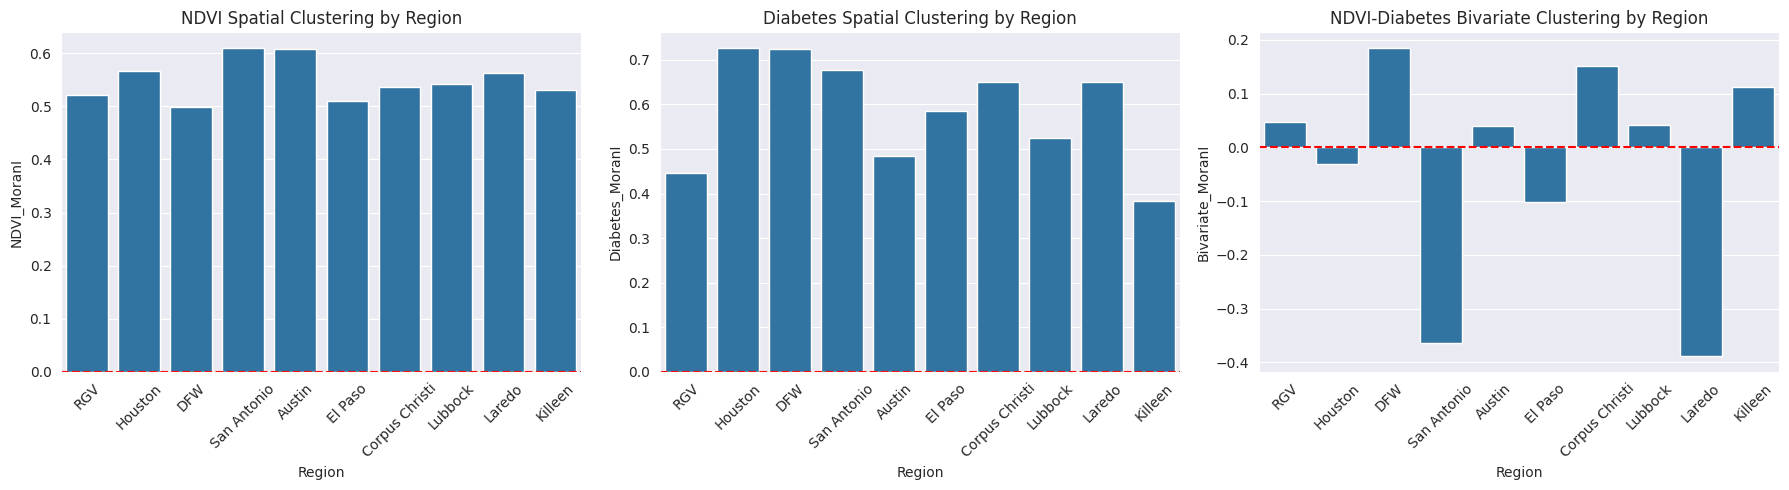

In [174]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: NDVI spatial autocorrelation by region
sns.barplot(data=results_df, x='Region', y='NDVI_MoranI', ax=axes[0])
axes[0].set_title('NDVI Spatial Clustering by Region')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Health outcome spatial autocorrelation by region
sns.barplot(data=results_df, x='Region', y='Diabetes_MoranI', ax=axes[1])
axes[1].set_title('Diabetes Spatial Clustering by Region')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Bivariate relationship
sns.barplot(data=results_df, x='Region', y='Bivariate_MoranI', ax=axes[2])
axes[2].set_title('NDVI-Diabetes Bivariate Clustering by Region')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Section 7 - Experimenting with a Geographically-Weighted Regression (GWR) Approach

/tmp/ipython-input-994276379.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-994276379.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4039.635
Log-likelihood:                                                   -1597.762
AIC:                                                               3207.523
AICc:                                                              3209.686
BIC:                                                               -469.120
R2:                                                                   0.597
Adj. R2:                                                              0.594

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

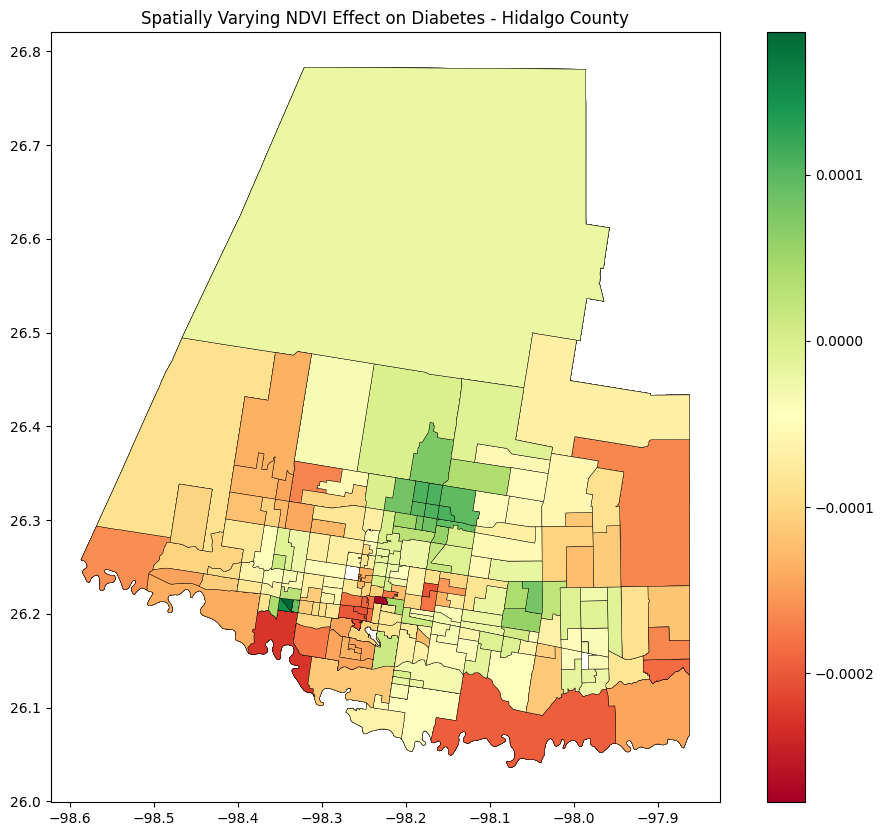

In [28]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_DBS = hidalgo_gdf['DIABETES_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_DBS, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_DBS = GWR(coords, y_gwr_DBS, X_gwr, bw).fit()

print(gwr_model_DBS.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_DBS.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Diabetes - Hidalgo County')
plt.show()

/tmp/ipython-input-2240847657.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-2240847657.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           2891.333
Log-likelihood:                                                   -1481.545
AIC:                                                               2975.090
AICc:                                                              2977.253
BIC:                                                              -1617.422
R2:                                                                   0.729
Adj. R2:                                                              0.727

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

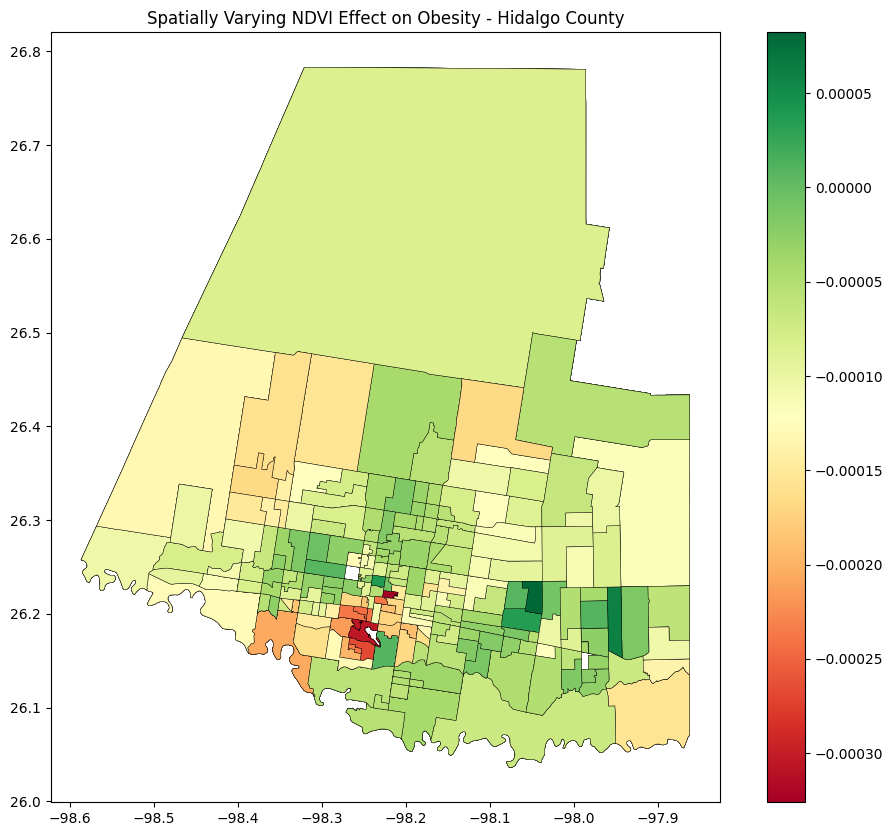

In [29]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_OBE = hidalgo_gdf['OBESITY_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_OBE, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_OBE = GWR(coords, y_gwr_OBE, X_gwr, bw).fit()

print(gwr_model_OBE.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_OBE.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Obesity - Hidalgo County')
plt.show()

/tmp/ipython-input-287638535.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-287638535.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           1547.080
Log-likelihood:                                                   -1264.236
AIC:                                                               2540.472
AICc:                                                              2542.635
BIC:                                                              -2961.676
R2:                                                                   0.577
Adj. R2:                                                              0.574

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

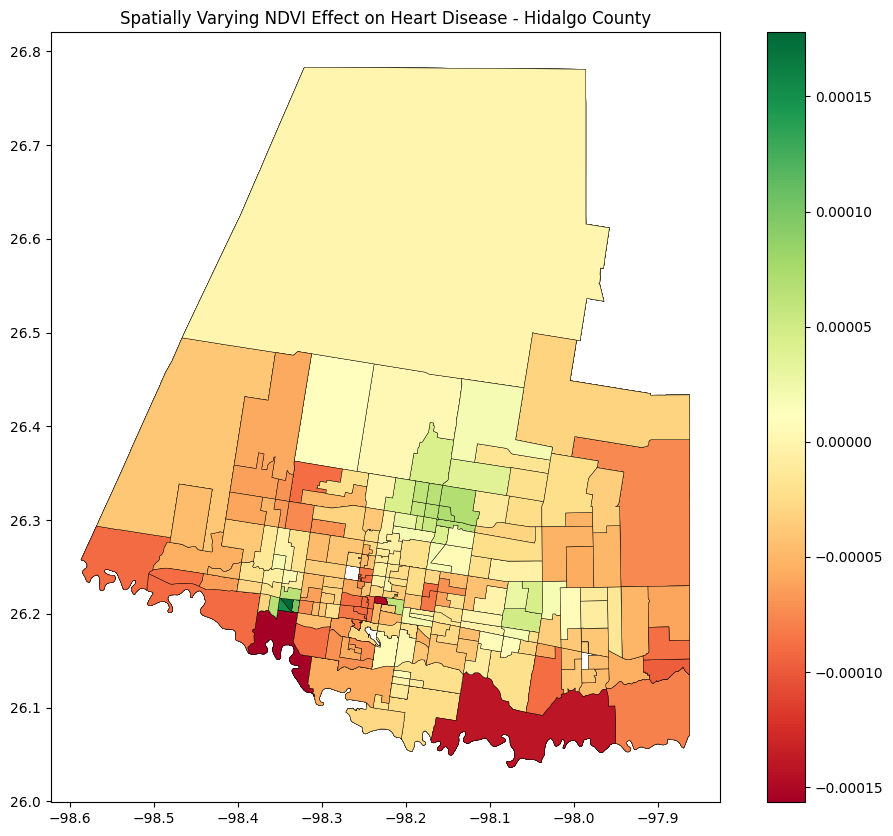

In [30]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_CHD = hidalgo_gdf['CHD_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_DBS, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_CHD = GWR(coords, y_gwr_CHD, X_gwr, bw).fit()

print(gwr_model_CHD.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_CHD.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Heart Disease - Hidalgo County')
plt.show()

/tmp/ipython-input-1072801060.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-1072801060.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            882.672
Log-likelihood:                                                   -1069.229
AIC:                                                               2150.458
AICc:                                                              2152.621
BIC:                                                              -3626.083
R2:                                                                   0.660
Adj. R2:                                                              0.658

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

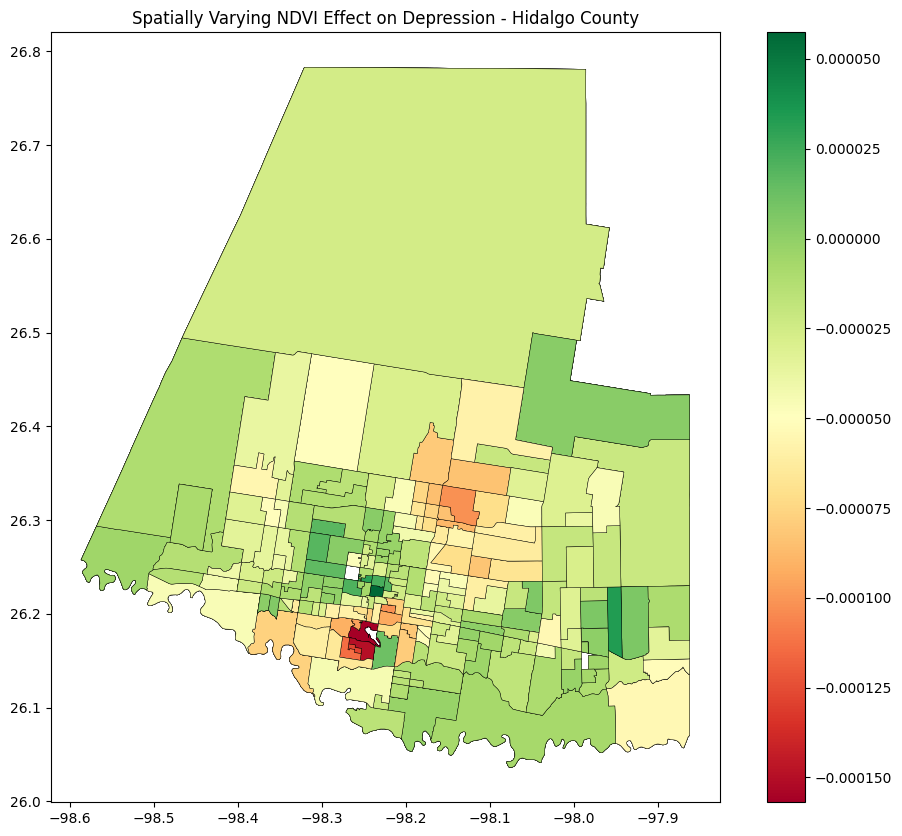

In [31]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_DEP = hidalgo_gdf['DEPRESSION_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_DEP, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_DEP = GWR(coords, y_gwr_DEP, X_gwr, bw).fit()

print(gwr_model_DEP.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_DEP.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Depression - Hidalgo County')
plt.show()

/tmp/ipython-input-2991772095.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-2991772095.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           2671.443
Log-likelihood:                                                   -1454.058
AIC:                                                               2920.116
AICc:                                                              2922.279
BIC:                                                              -1837.312
R2:                                                                   0.781
Adj. R2:                                                              0.779

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

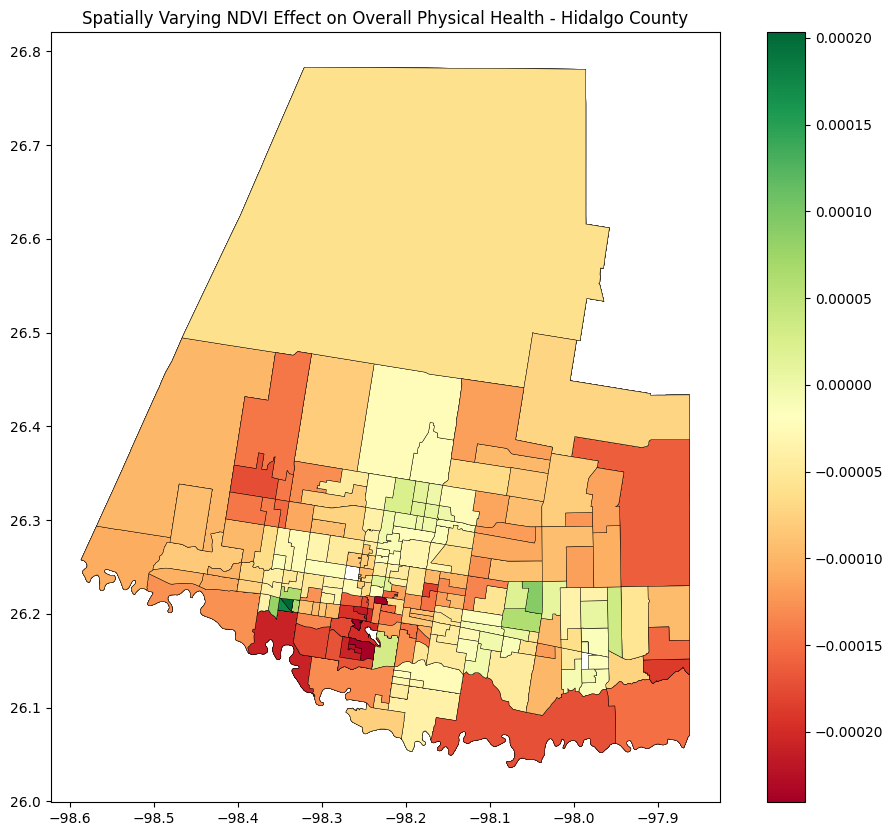

In [32]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_PHLTH = hidalgo_gdf['PHLTH_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_PHLTH, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_PHLTH = GWR(coords, y_gwr_PHLTH, X_gwr, bw).fit()

print(gwr_model_PHLTH.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_PHLTH.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Overall Physical Health - Hidalgo County')
plt.show()

/tmp/ipython-input-640823455.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
/tmp/ipython-input-640823455.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hidalgo_gdf.geometry.centroid.y)))


Model type                                                         Gaussian
Number of observations:                                                 695
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           1841.194
Log-likelihood:                                                   -1324.717
AIC:                                                               2661.434
AICc:                                                              2663.597
BIC:                                                              -2667.561
R2:                                                                   0.722
Adj. R2:                                                              0.720

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

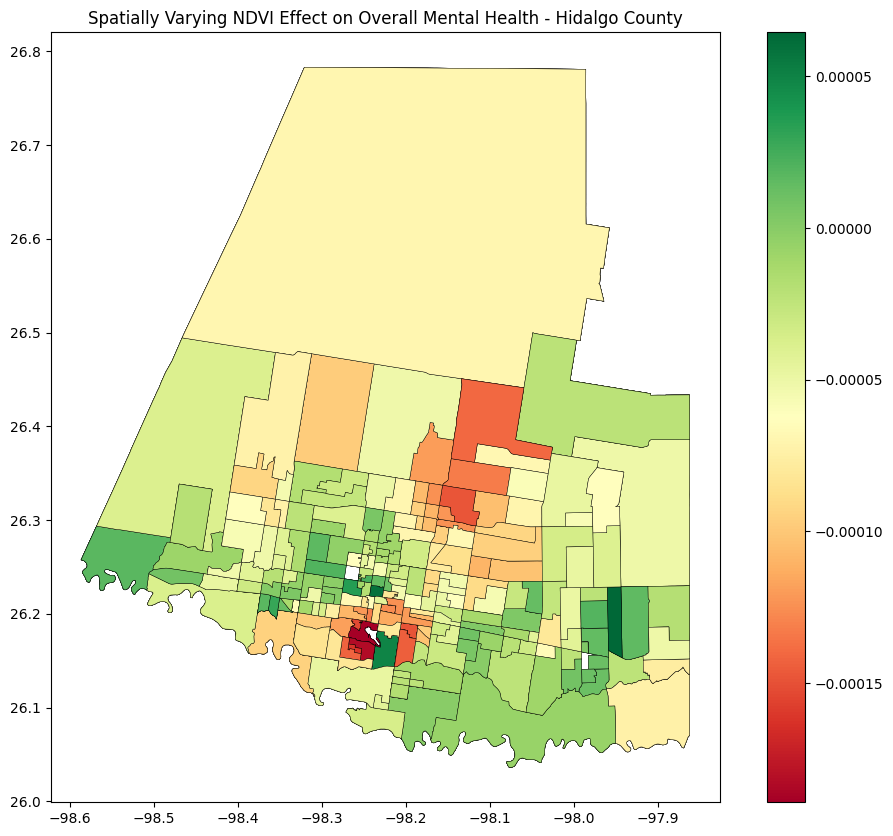

In [33]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import libpysal as lps

# Prepare data
coords = np.array(list(zip(hidalgo_gdf.geometry.centroid.x,
                           hidalgo_gdf.geometry.centroid.y)))
y_gwr_MHLTH = hidalgo_gdf['MHLTH_CrudePrev'].values.reshape(-1, 1)
X_gwr = hidalgo_gdf[['HHINCOME_Median', 'PEOPCOLOR_Pct', 'LINGISO_Pct', 'LESSHS_Pct', 'NDVI_Mean']].values

# Select bandwidth
selector = Sel_BW(coords, y_gwr_MHLTH, X_gwr)
bw = selector.search()

# Fit GWR
gwr_model_MHLTH = GWR(coords, y_gwr_MHLTH, X_gwr, bw).fit()

print(gwr_model_MHLTH.summary())

# Map spatially varying NDVI coefficients
hidalgo_gdf['ndvi_coefficient'] = gwr_model_MHLTH.params[:, 1]  # NDVI is column 1

fig, ax = plt.subplots(figsize=(12, 10))
hidalgo_gdf.plot(column='ndvi_coefficient', cmap='RdYlGn',
                 legend=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Spatially Varying NDVI Effect on Overall Mental Health - Hidalgo County')
plt.show()